In [1]:
import numpy as np
import pandas as pd

#### Problem Statement
Understand the characteristics of customer that will continue buying products

#### Problem Solution

- Analyse and understand the behavioural aspects of Starbucks customer
- Perform customer segmentation based on the study
- Find out key parameters of the customer loyalty using Chi-Square test of independence

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv("Starbucks satisfactory survey.csv")
df.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


### Data Wrangling

In [33]:
df.columns = ['Timestamp',
              'Gender',
              'Age',
              'Occupation',
              'Annual_Income',
              'Visit_Frequency',
              'Service_preferred',
              'Time_Spent_Frequency',
              'Nearest_Store_Distance',
              'Membership',
              'Frequent_Product',
              'Avg_Money_Spent',
              'Quality_Rating_vs_Other_Brands',
              'Price_Rating',
              'Sales_Promotion_Importance',
              'Ambiance_Rating',
              'WiFi_Rating',
              'Service_Rating',
              'Meetings_hangouts_preference',
              'Promotion_Source',
              'Loyalty'
             ]
df.head()

,Timestamp,Gender,Age,Occupation,Annual_Income,Visit_Frequency,Service_preferred,Time_Spent_Frequency,Nearest_Store_Distance,Membership,...,Avg_Money_Spent,Quality_Rating_vs_Other_Brands,Price_Rating,Sales_Promotion_Importance,Ambiance_Rating,WiFi_Rating,Service_Rating,Meetings_hangouts_preference,Promotion_Source,Loyalty
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [8]:
len(df)

122

#### Check the different Columns datatypes and null values

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Timestamp                       122 non-null    object
 1   Gender                          122 non-null    object
 2   Age                             122 non-null    object
 3   Occupation                      122 non-null    object
 4   Annual_Income                   122 non-null    object
 5   Visit_Frequency                 122 non-null    object
 6   Service_preferred               121 non-null    object
 7   Time_Spent_Frequency            122 non-null    object
 8   Nearest_Store_Distance          122 non-null    object
 9   Membership                      122 non-null    object
 10  Frequent_Product                122 non-null    object
 11  Avg_Money_Spent                 122 non-null    object
 12  Quality_Rating_vs_Other_Brands  122 non-null    in

In [35]:
df[df.Service_preferred.isnull()]

,Timestamp,Gender,Age,Occupation,Annual_Income,Visit_Frequency,Service_preferred,Time_Spent_Frequency,Nearest_Store_Distance,Membership,...,Avg_Money_Spent,Quality_Rating_vs_Other_Brands,Price_Rating,Sales_Promotion_Importance,Ambiance_Rating,WiFi_Rating,Service_Rating,Meetings_hangouts_preference,Promotion_Source,Loyalty
81,2019/10/03 9:11:28 AM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Never,NaN,Below 30 minutes,more than 3km,No,...,Zero,1,1,1,3,3,3,3,NaN,No


In [36]:
# Only one row has null value. Delete the row
df = df[-df.Service_preferred.isnull()]
len(df)

121

In [37]:
df.describe()

,Quality_Rating_vs_Other_Brands,Price_Rating,Sales_Promotion_Importance,Ambiance_Rating,WiFi_Rating,Service_Rating,Meetings_hangouts_preference
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,3.685950,2.909091,3.818182,3.760331,3.256198,3.752066,3.520661
std,0.913173,1.072381,1.064581,0.931171,0.962020,0.829468,1.033595
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Univariate Analysis

In [38]:
num_cols = df.select_dtypes(include='int64').columns
num_cols

Index(['Quality_Rating_vs_Other_Brands', 'Price_Rating',
       'Sales_Promotion_Importance', 'Ambiance_Rating', 'WiFi_Rating',
       'Service_Rating', 'Meetings_hangouts_preference'],
      dtype='object')

Plots for Column: Quality_Rating_vs_Other_Brands


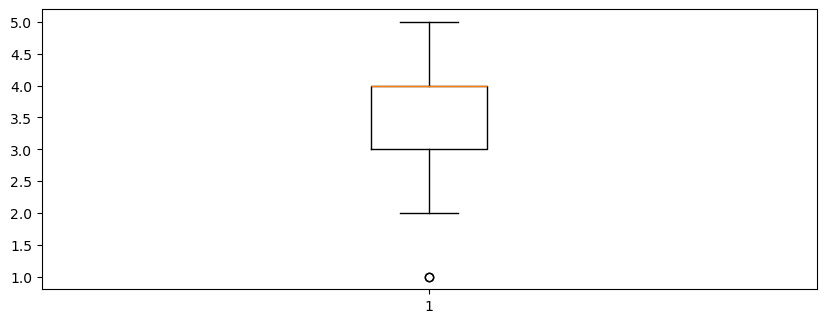

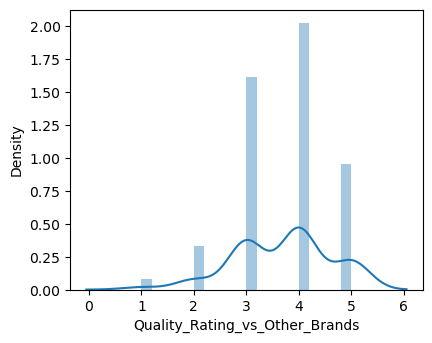



Plots for Column: Price_Rating


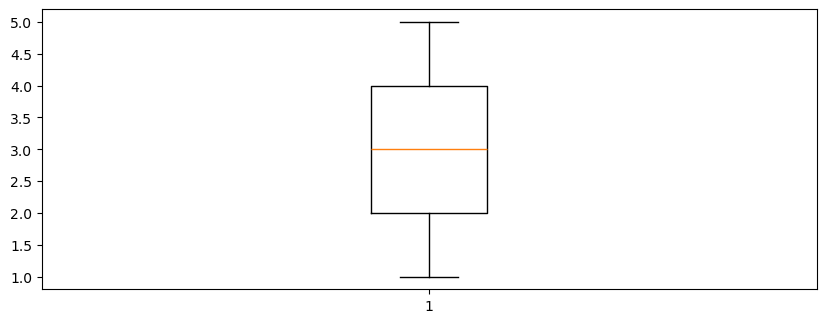

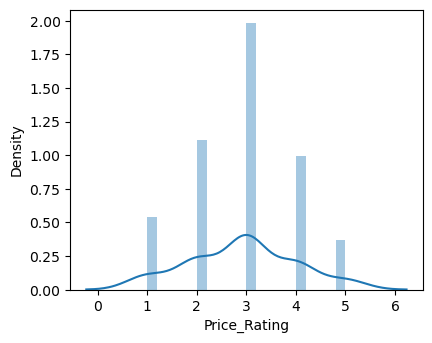



Plots for Column: Sales_Promotion_Importance


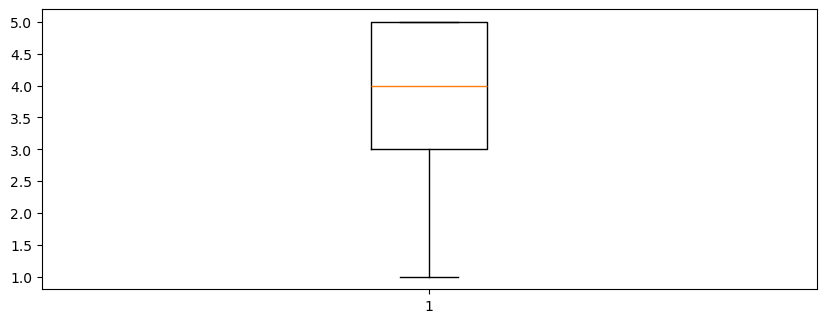

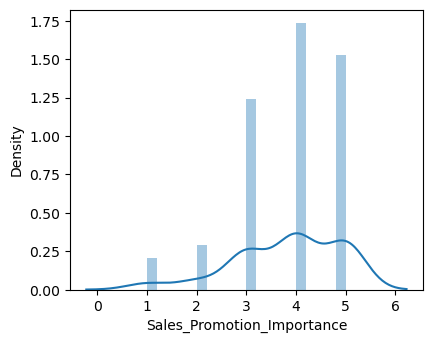



Plots for Column: Ambiance_Rating


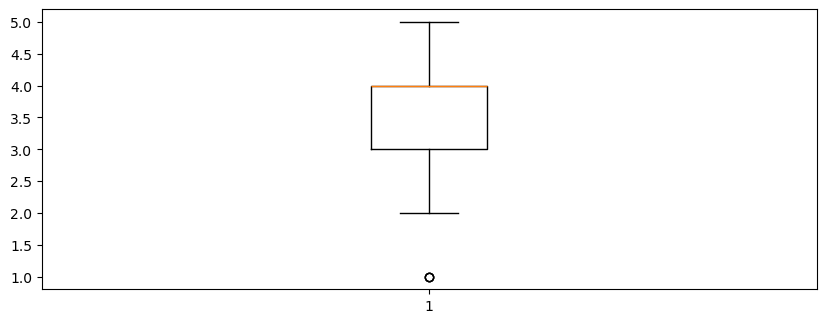

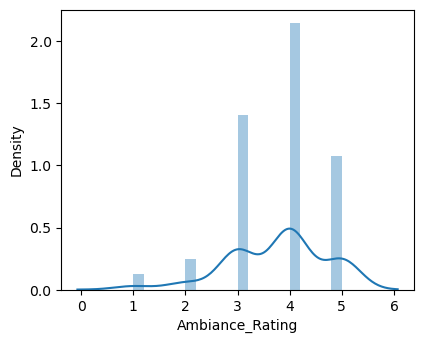



Plots for Column: WiFi_Rating


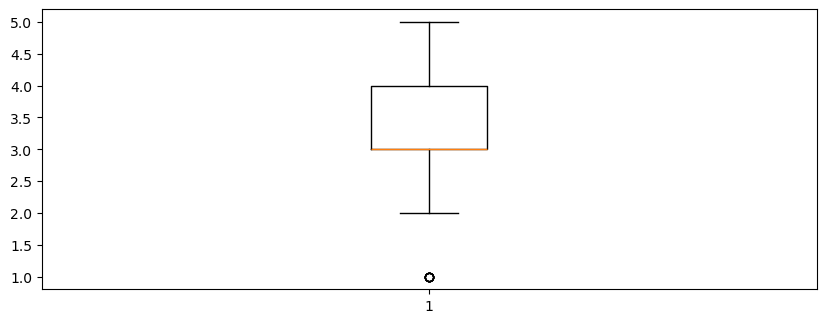

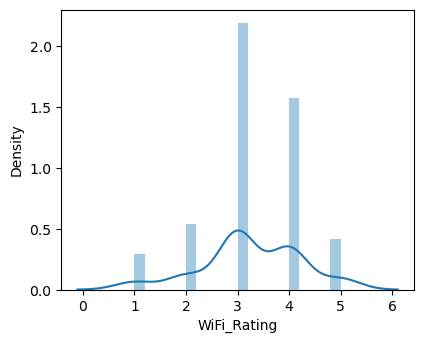



Plots for Column: Service_Rating


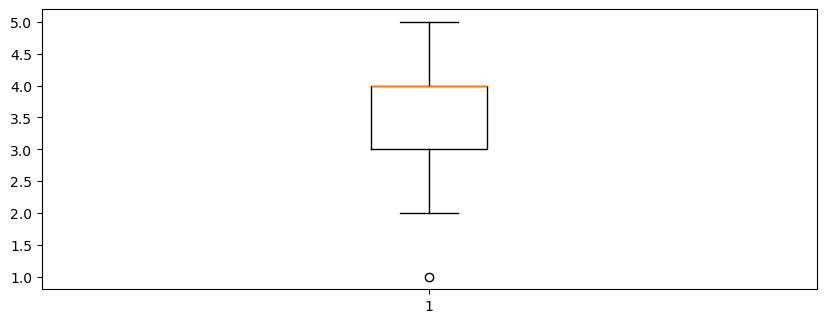

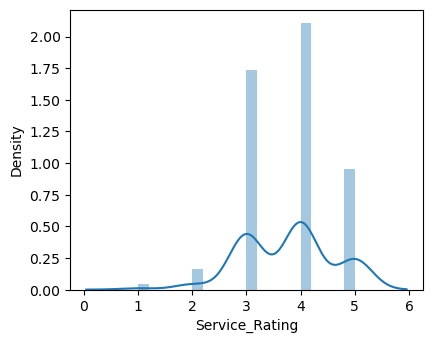



Plots for Column: Meetings_hangouts_preference


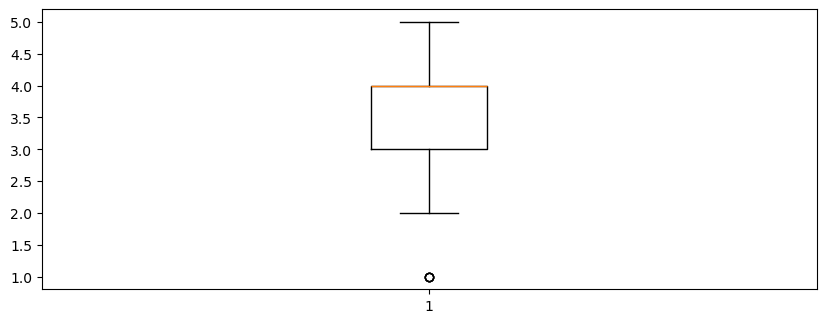

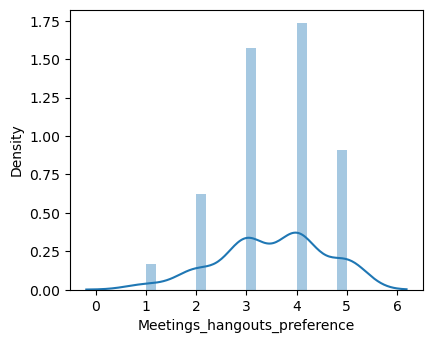

In [21]:
def plot_numeric(df,x):
    plt.figure(figsize=(10,8))
    plt.subplot(2,1,1)
    plt.boxplot(df[i], vert=True)
    plt.show()
    plt.figure(figsize=(10,8))
    plt.subplot(2,2,2)
    sns.distplot(df[i], bins=20)
    plt.show()
    
for i in num_cols:
    print("Plots for Column: "+ i)
    plot_numeric(df,i)
    print("\n")

- Majority customers(50%) rated 4 for quality vs other brands
- Price rating is uniformly distributed. There are approximately equal no of customers who can afford or not afford the prices
- Sales and Promotion have very good impact on the customer purchase decision(90% cusomters rated above 3)
- Majority customers rated ambiance >=3 (90%)
- Majority customers rated wifi service 3 (around 55%)
- The Serivce ratings given by the customers are around 3-5(around 90% customers)
- around 80% customers prefer Starbucks for Meetings/hangouts

`From the above graphs we can see there are outliers in the data. Lets check the dataset`

In [39]:
df[df.Quality_Rating_vs_Other_Brands <2]

,Timestamp,Gender,Age,Occupation,Annual_Income,Visit_Frequency,Service_preferred,Time_Spent_Frequency,Nearest_Store_Distance,Membership,...,Avg_Money_Spent,Quality_Rating_vs_Other_Brands,Price_Rating,Sales_Promotion_Importance,Ambiance_Rating,WiFi_Rating,Service_Rating,Meetings_hangouts_preference,Promotion_Source,Loyalty
112,2019/10/03 7:58:17 PM GMT+8,Male,From 20 to 29,Student,"More than RM150,000",Never,Never,Below 30 minutes,more than 3km,No,...,Zero,1,1,1,1,1,1,1,Billboards,No
121,2019/10/05 4:57:22 PM GMT+8,Male,From 20 to 29,Employed,"RM50,000 - RM100,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,...,Less than RM20,1,1,5,4,3,3,2,In Store displays,No


In [40]:
df = df[df.Quality_Rating_vs_Other_Brands >1]
len(df)

119

In [41]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Timestamp', 'Gender', 'Age', 'Occupation', 'Annual_Income',
       'Visit_Frequency', 'Service_preferred', 'Time_Spent_Frequency',
       'Nearest_Store_Distance', 'Membership', 'Frequent_Product',
       'Avg_Money_Spent', 'Promotion_Source', 'Loyalty'],
      dtype='object')

CountPlot for the column: Gender


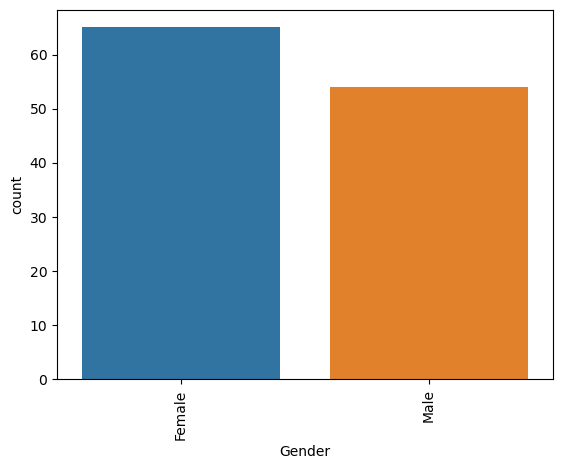

CountPlot for the column: Age


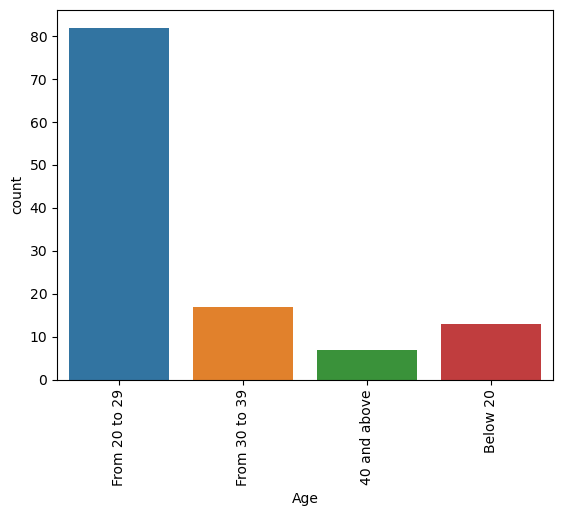

CountPlot for the column: Occupation


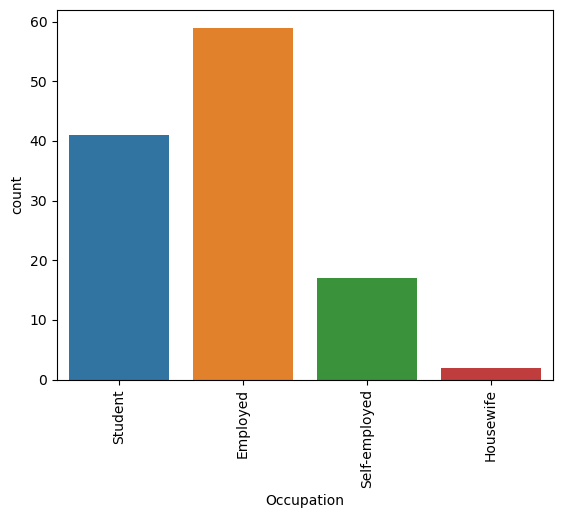

CountPlot for the column: Annual_Income


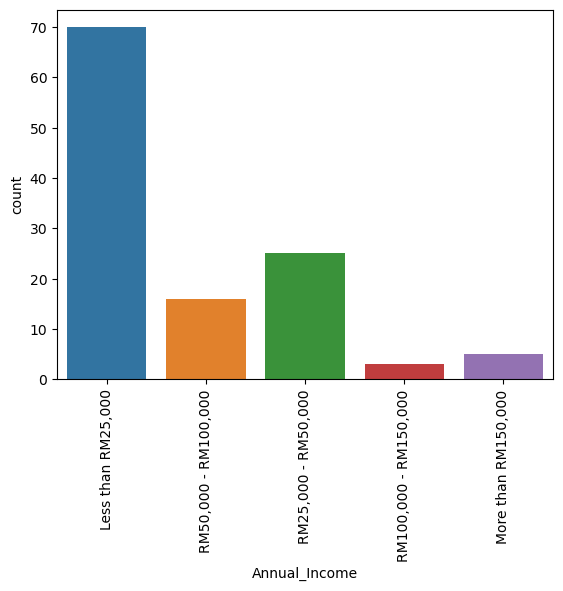

CountPlot for the column: Visit_Frequency


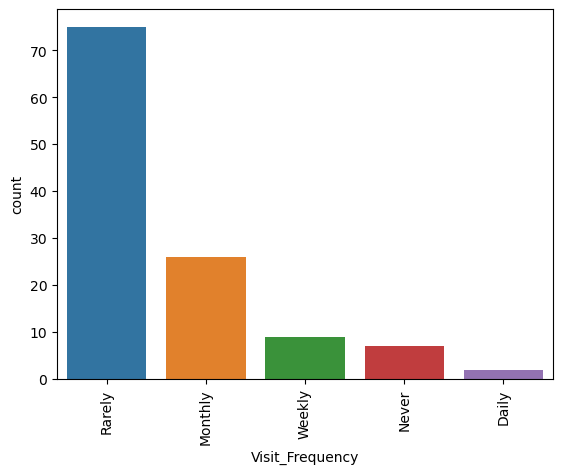

CountPlot for the column: Service_preferred


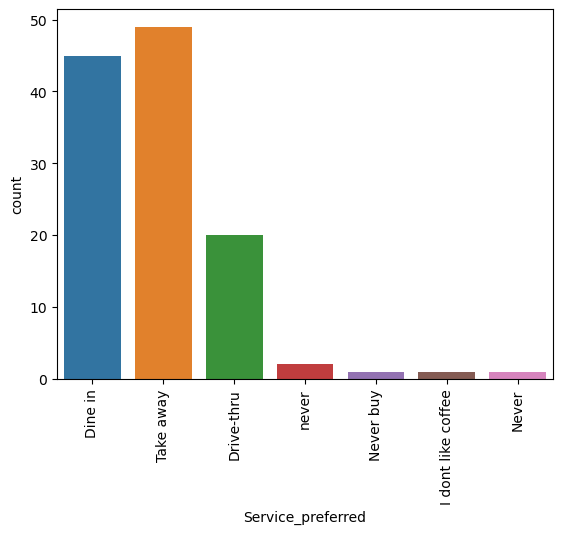

CountPlot for the column: Time_Spent_Frequency


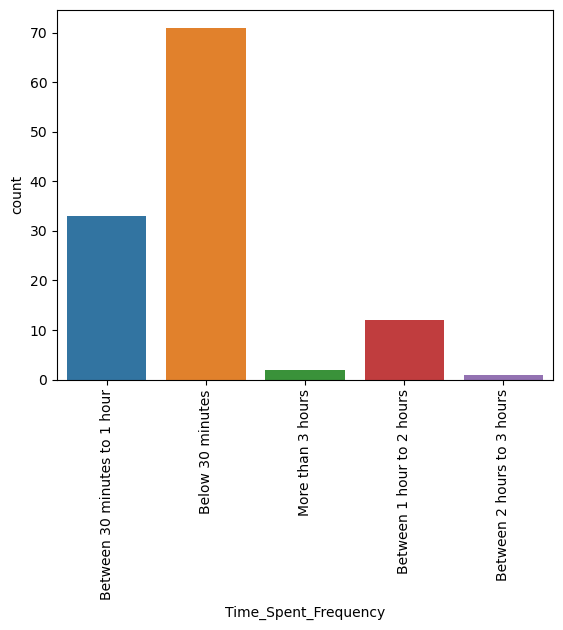

CountPlot for the column: Nearest_Store_Distance


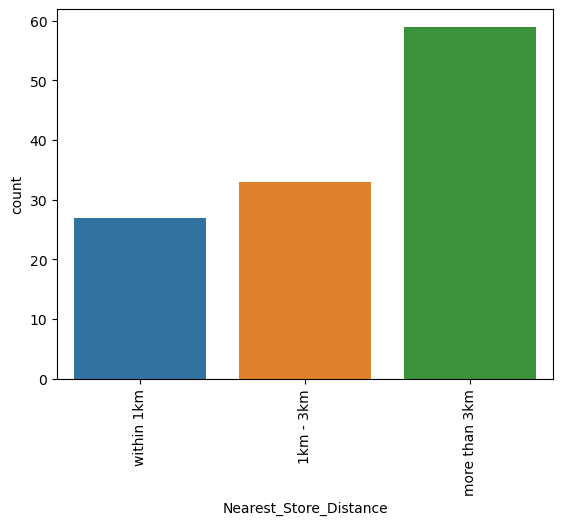

CountPlot for the column: Membership


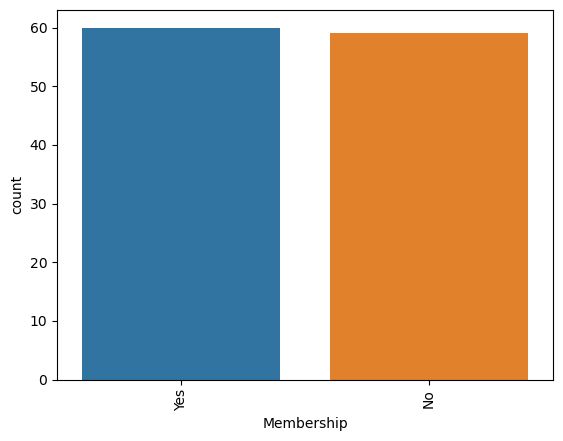

CountPlot for the column: Frequent_Product


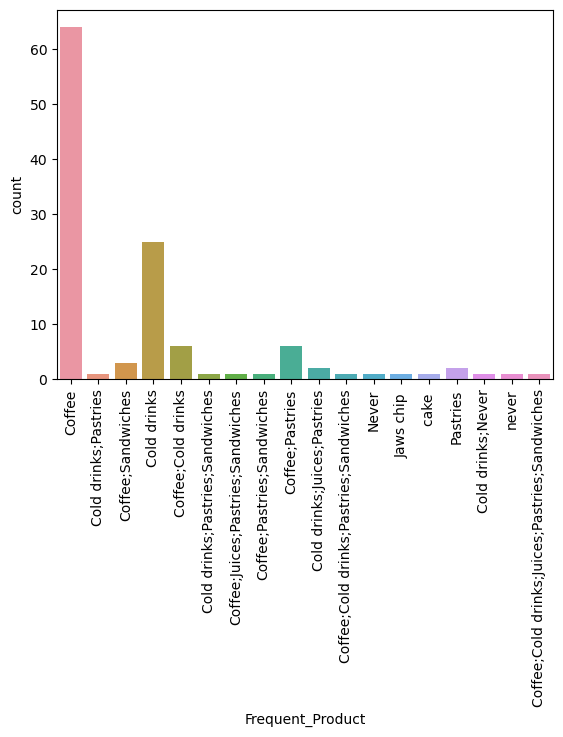

CountPlot for the column: Avg_Money_Spent


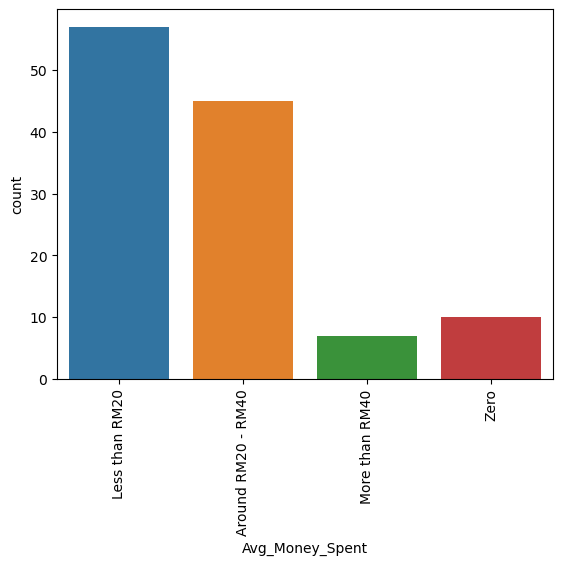

CountPlot for the column: Promotion_Source


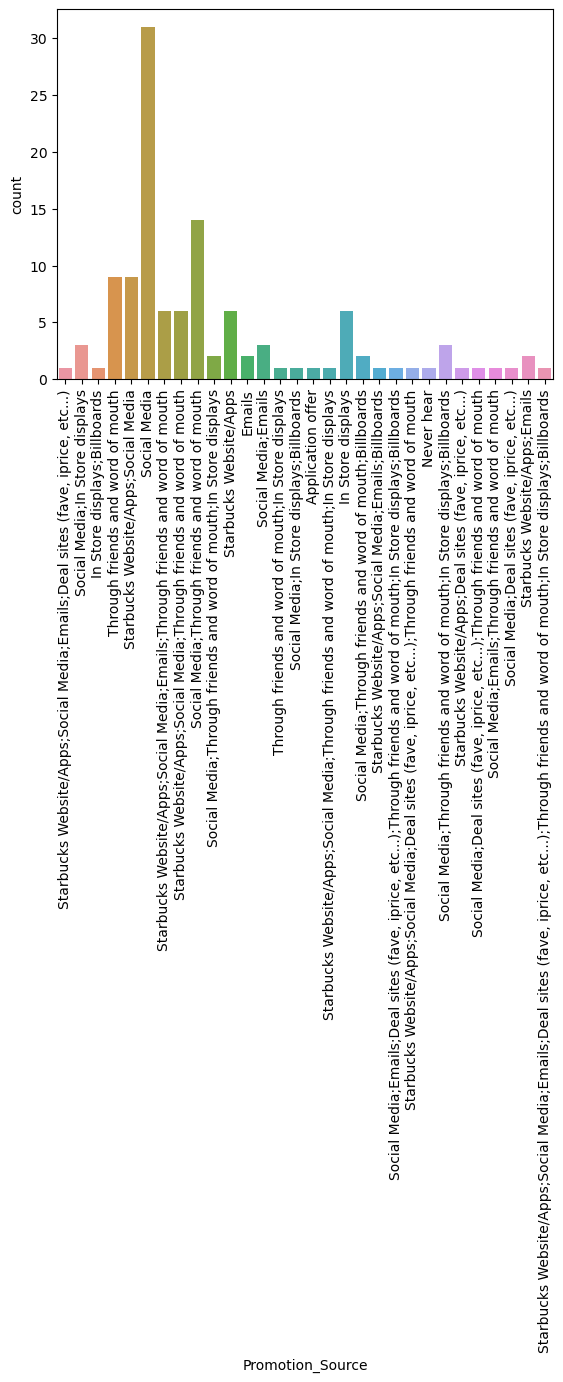

CountPlot for the column: Loyalty


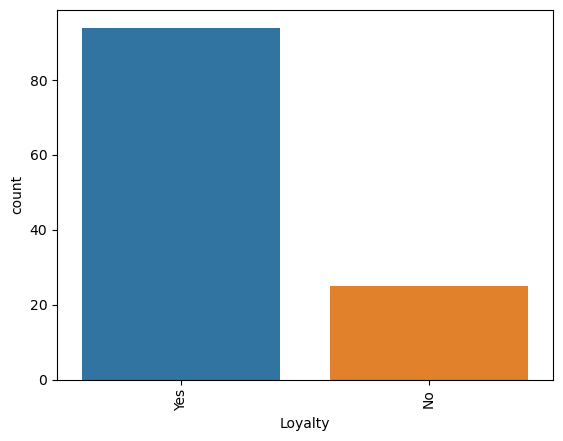

In [48]:
for i in cat_cols[1:]:
    print("CountPlot for the column: "+ i)
    sns.countplot(x=df[i], data=df)
    plt.xticks(rotation=90)
    plt.show()

- Both Females and  Males customer are comparable in count
- Customers between age 20 to 29 are the majority customers then 30 to 40 age. 40 and above age group are less interested in the products
- Employees and Students are more interested in the products compared to Self-employed. Ignore Housewife as the category has too less in count to consider to draw insights
- Customers with annual income below RM50000 are the potential customers
- Most of the customers visit rarely. Monthly visitors are also significant in number. Daily visitors are very less in count
- Take away customers are very high next comes the Drive In and then Drive thru categories
- Majority customers spend less than an hour. Very few people spend time around an hour to two
- Majority of customers are more than 3km distance from the store.
- Customers with membership are almost in number to no membership customers
- Coffee, Cold drinks, Pastries seems to be the frequently bought products in Store
- Majority of people spend money less  than RM20. Customer count spending more money decreases with increase in Money
- Social media is the main source of Promotion for the products
- Interestingly, even the customers having/not having membership are equal in number, majority of customers are loyal to our brand

####  Bi-Variate Analysis

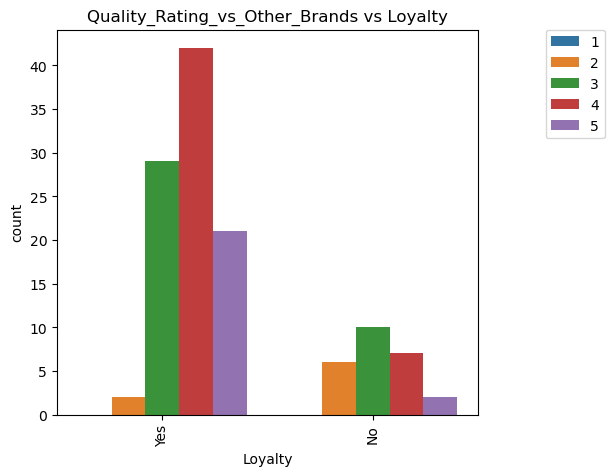

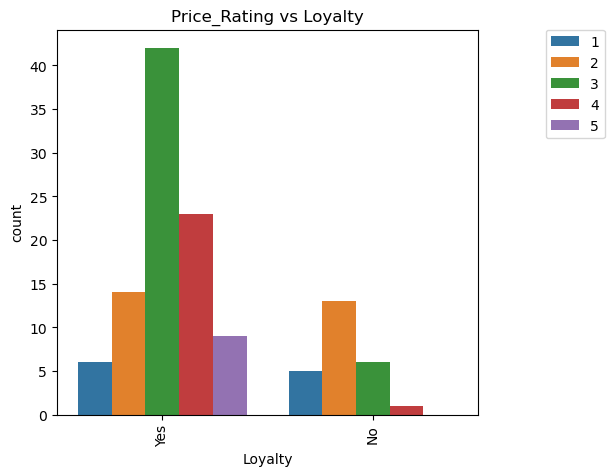

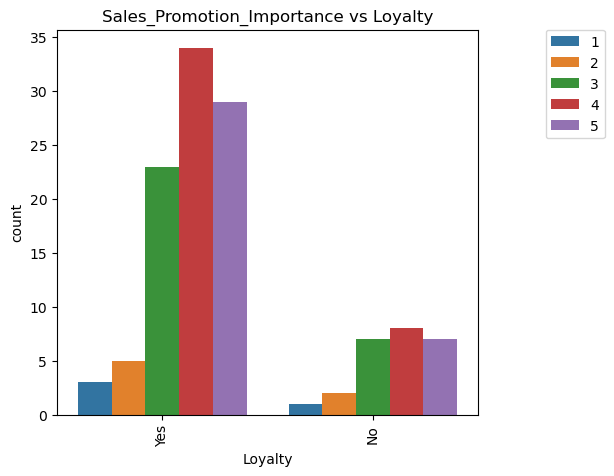

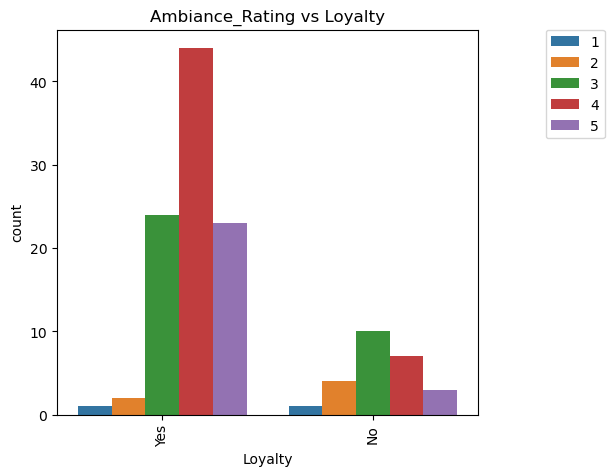

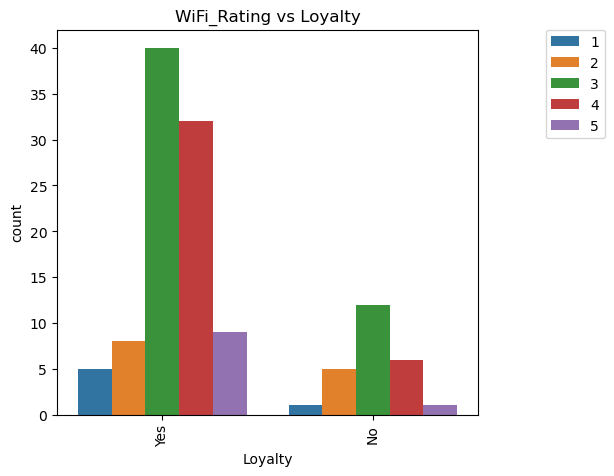

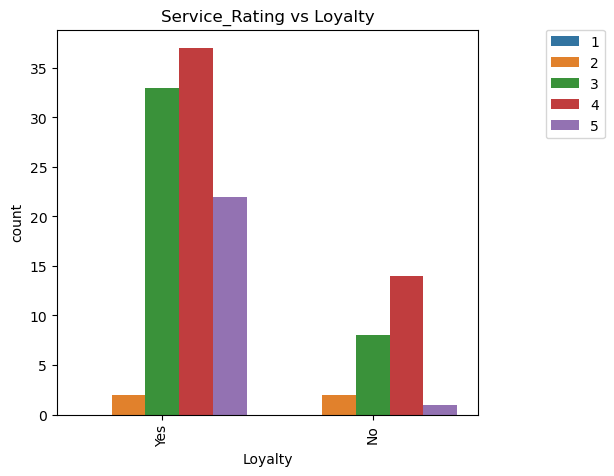

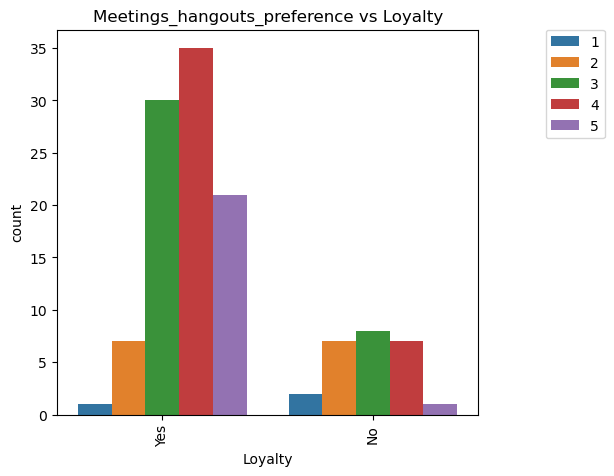

In [85]:
hue_order=['1','2','3','4','5']
for i in num_cols:
    df[i]=df[i].astype(str)
    plt.figure(figsize=(25,5))
    plt.subplot(1,4,1)
    sns.countplot(x=df.Loyalty, hue=df[i], hue_order=hue_order)
    plt.title(i+" vs Loyalty")
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)
    plt.show()

##### Among the loyal customer
- 4 is the most common quality rating
- 3 is  the most common price rating and price rating of 5 are loyal customers
- 4 is the most common ambiance rating<br>
##### Among the Non_Loyal customers
- 3 is the most common quality rating
- 2 is the most common price rating
- 3 is the most common ambiance rating

- Loyality doesn't seem to depend on wifi rating and sales promotion much
- Customers giving Service rating 5 have more likely loyal customers. The likeliness seems to be decreasing with decreasing rating
- Customers with meeting_hangout_preference 4 are more likely loyal

Lets analyse the categorical columns

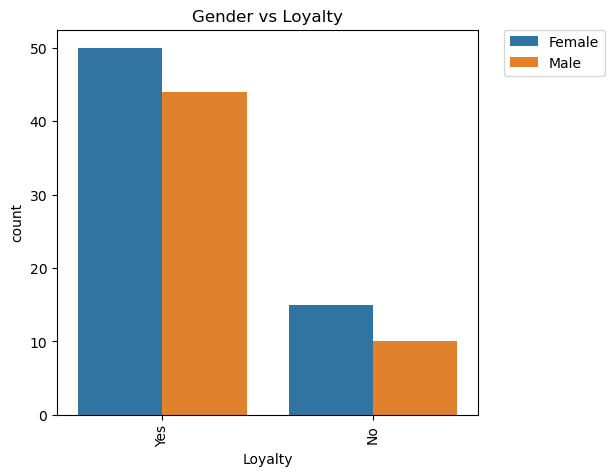

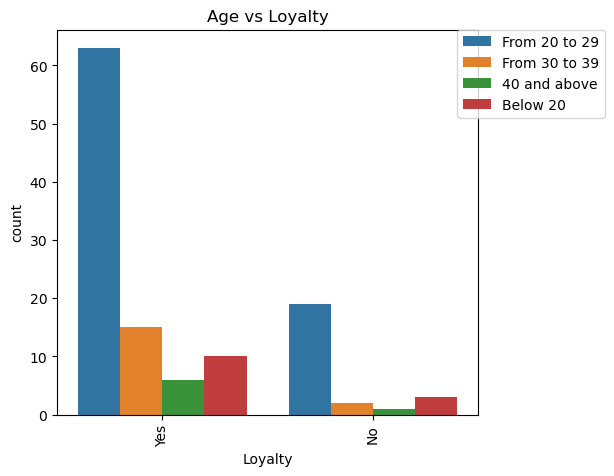

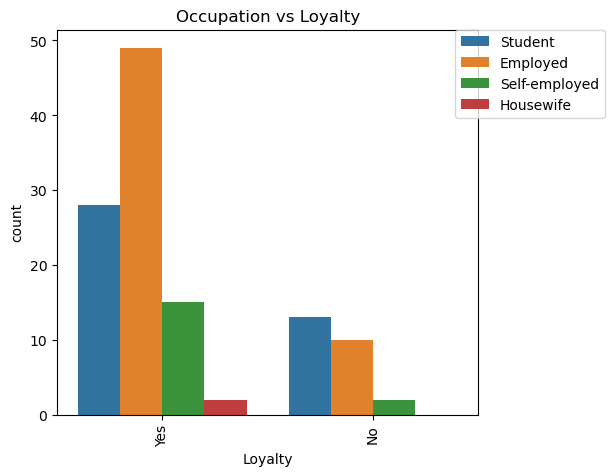

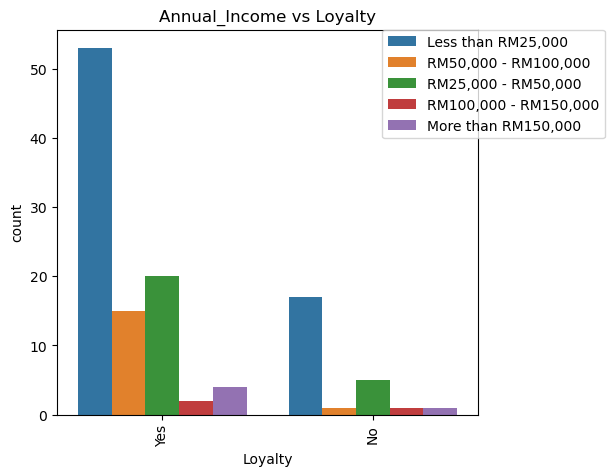

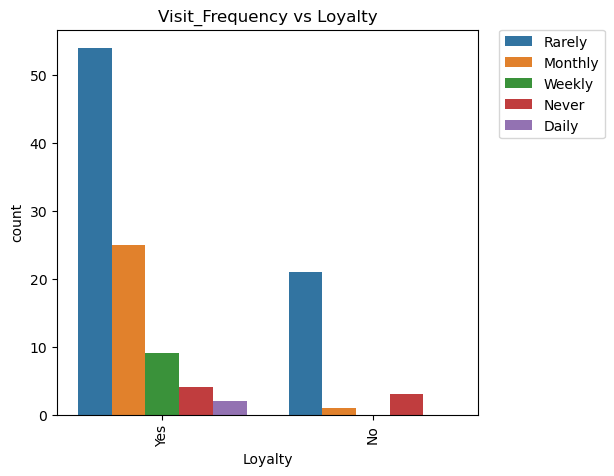

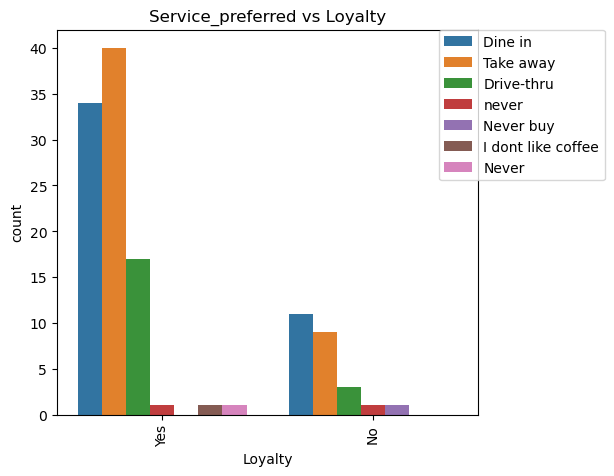

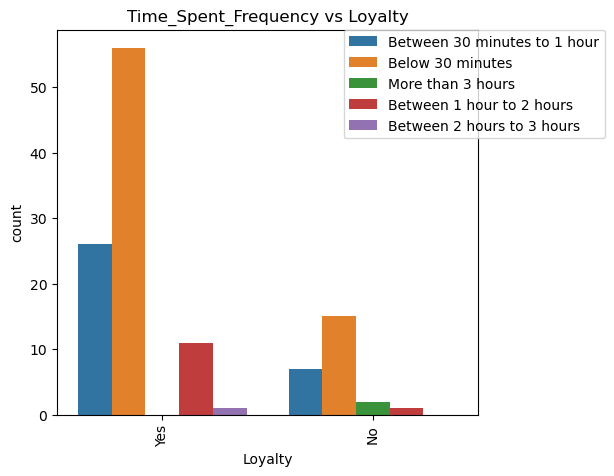

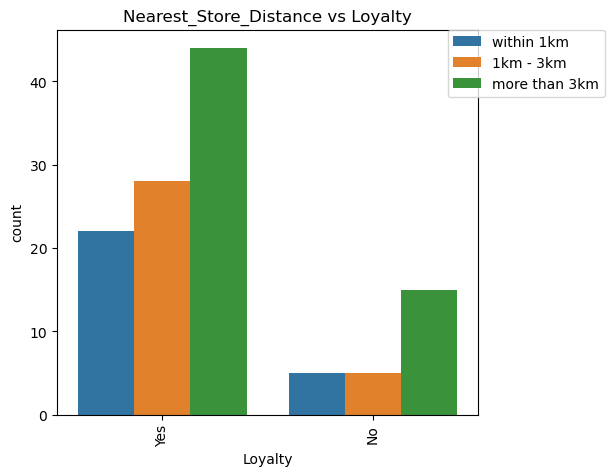

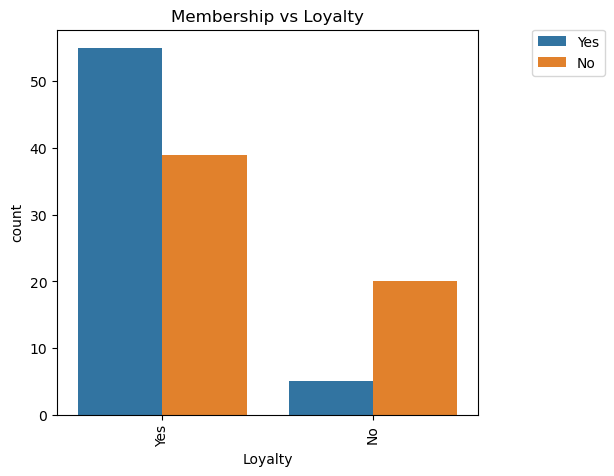

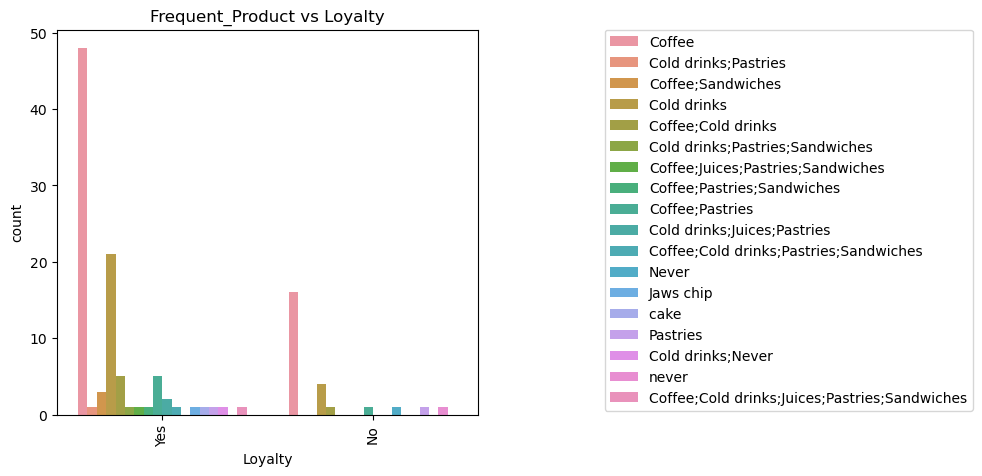

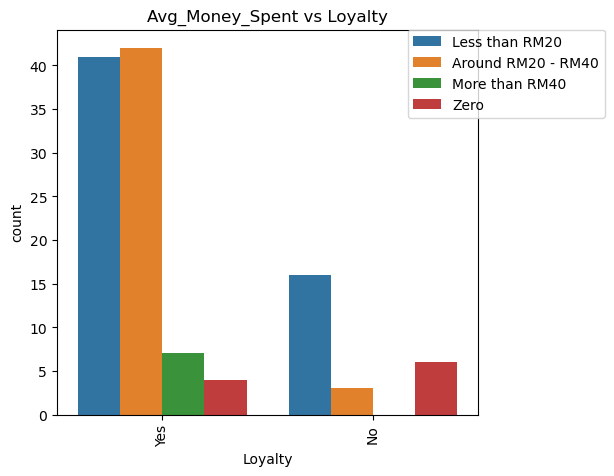

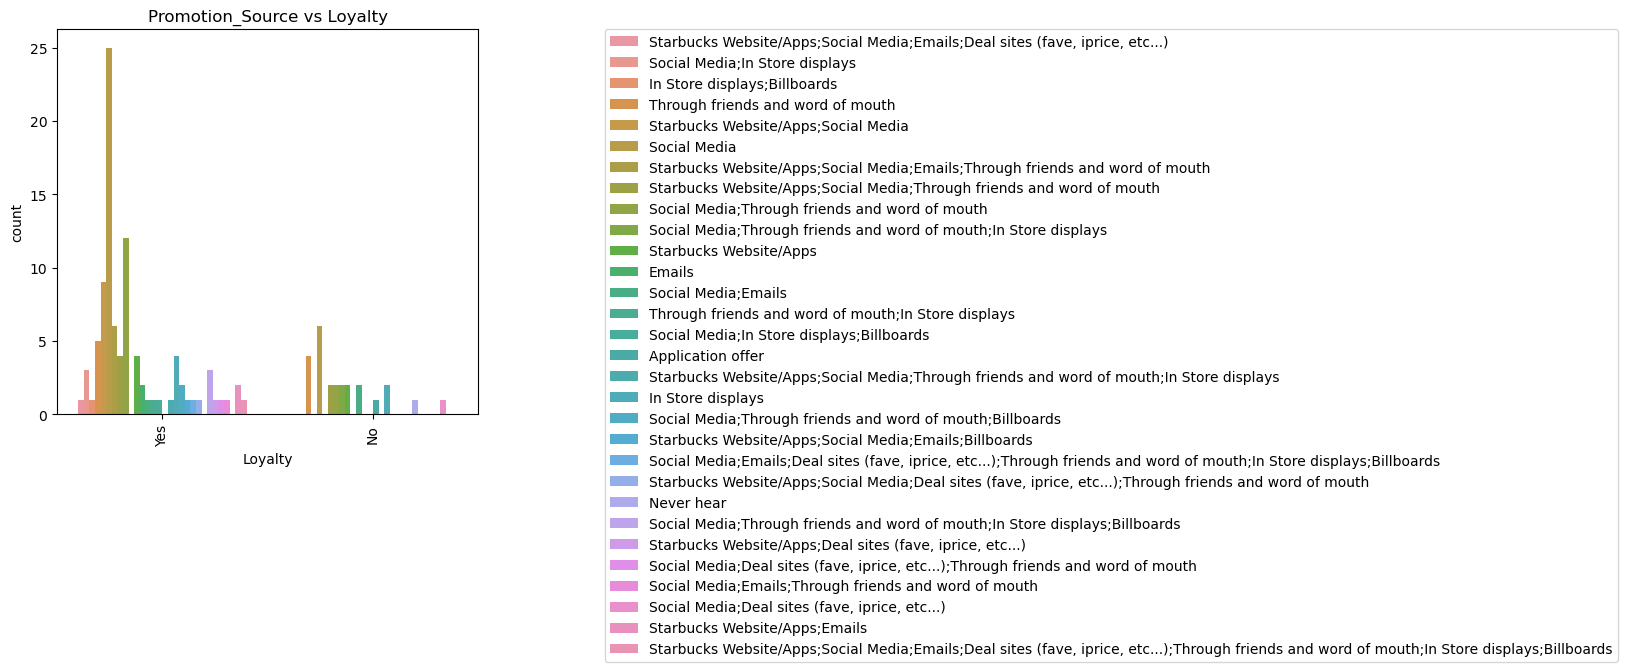

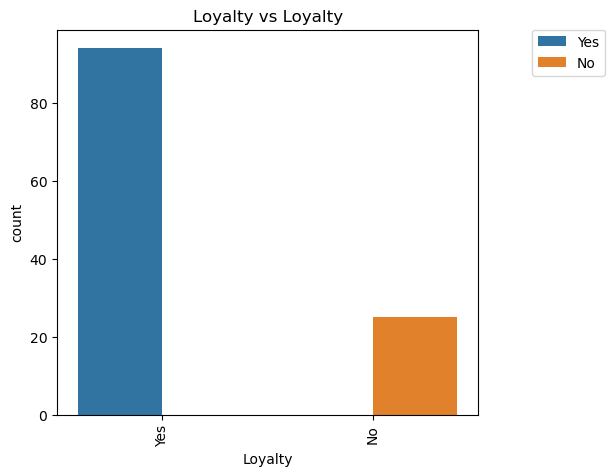

In [69]:
for i in cat_cols[1:]:
    plt.figure(figsize=(25,5))
    plt.subplot(1,4,1)
    sns.countplot(x=df.Loyalty, hue=df[i])
    plt.title(i+" vs Loyalty")
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)
    plt.show()

- Gender doesn't seem to have impact on the Loyalty. Female customers are more in number
- Customers from age group 20-29 are major segment next comes 30-39 among both loyal and non-loyal customers
- Employed customers are major category among loyal customers whereas Students are major category among non-loyal customers
- Customers with annual_income 50k-100k are more in number among loyal customers
- Customers with visit frequency rarely 
- Take away is the majority among loyal customers, whereas Dine in Non-Loyal customers
- Time spent and nearest store distance doesn't seem to have much influence on the loyalty. To be  analysed futher
- Customers with membership are more loyal
- Coffee, cold drinks, pastries are major categories of frequently bought products
- Customers spent money more than RM20 are more loyal
- Social  Media is the major Promotion source

#### Multi-Variate Analysis

In [86]:
def plot_fun(df, col1, col2, col3):

    plot_df = df[[col1, col2, col3]]
    plot_df['dummy'] = np.ones(len(plot_df), dtype=int)
    plot_df

    grouped_plot = plot_df.groupby([col1, col2, col3]).count().unstack(level=2)
    grouped_plot

    loyalty = grouped_plot.columns.levels[1]
    colors = [plt.get_cmap('viridis')(i) for i in np.linspace(0,1,len(loyalty))]
    colors

    sns.set(context='talk')
    nxplots = len(grouped_plot.index.levels[0])
    nyplots = len(grouped_plot.index.levels[1])
    fig, axes = plt.subplots(nrows=nxplots, ncols=nyplots, sharex=True, sharey=True, figsize=(12,10))
    fig.suptitle(col1 +' vs '+col2+' vs '+col3)

    for a,i in enumerate(grouped_plot.index.levels[0]):
        for b,j in enumerate(grouped_plot.index.levels[1]):
            try:
                axes[a,b].bar(grouped_plot.columns.levels[1], grouped_plot.loc[i,j], color=colors)
                print(i,j)
                axes[a,b].xaxis.set_ticks([])
            except:
                pass

    axeslabel = fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none')
    plt.grid(False)
    axeslabel.set_ylabel(col1,rotation='horizontal',y=1,weight="bold")
    axeslabel.set_xlabel(col2,y=1,weight="bold")
    for i, j in enumerate(grouped_plot.index.levels[1]):
        axes[-1,i].set_xlabel(j, rotation=90)
    for i, j in enumerate(grouped_plot.index.levels[0]):
        axes[i,0].set_ylabel(j, rotation=90)

    fig.subplots_adjust(right=0.82)

    fig.legend([Patch(facecolor = i) for i in colors],
               grouped_plot.columns.levels[1],
               title="Loyalty",
               loc="center right")
    print(grouped_plot)
    


`age_vs_AnnualIncome_vs_Loyalty`

40 and above Less than RM25,000
40 and above More than RM150,000
40 and above RM100,000 - RM150,000
40 and above RM25,000 - RM50,000
40 and above RM50,000 - RM100,000
Below 20 Less than RM25,000
From 20 to 29 Less than RM25,000
From 20 to 29 More than RM150,000
From 20 to 29 RM25,000 - RM50,000
From 20 to 29 RM50,000 - RM100,000
From 30 to 39 Less than RM25,000
From 30 to 39 More than RM150,000
From 30 to 39 RM100,000 - RM150,000
From 30 to 39 RM25,000 - RM50,000
From 30 to 39 RM50,000 - RM100,000
                                    dummy      
Loyalty                                No   Yes
Age           Annual_Income                    
40 and above  Less than RM25,000      NaN   1.0
              More than RM150,000     NaN   1.0
              RM100,000 - RM150,000   NaN   2.0
              RM25,000 - RM50,000     1.0   1.0
              RM50,000 - RM100,000    NaN   1.0
Below 20      Less than RM25,000      3.0  10.0
From 20 to 29 Less than RM25,000     14.0  37.0
              Mor

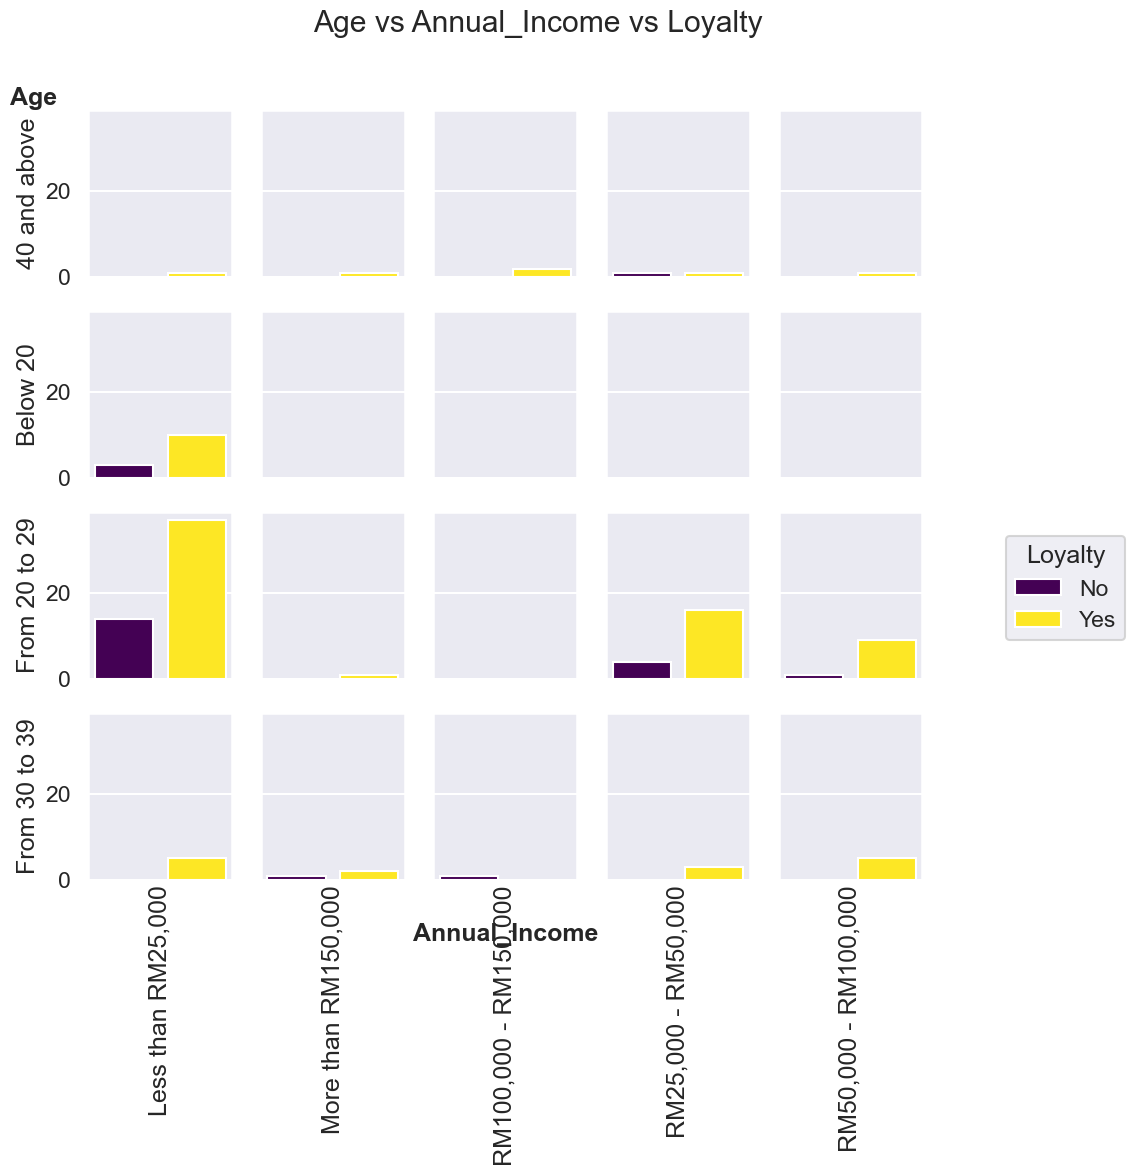

In [87]:
plot_fun(df, 'Age','Annual_Income','Loyalty')

- Age group 20-29 is the majority group. Their loyality percentge is increasing with the increase in salary
- Age group below 20 customers have income lessthan RM25000
- Customer interest in the products is decreasing with the increase in age from 20

`age_vs_Occupation_vs_Loyalty`

40 and above Employed
40 and above Housewife
40 and above Self-employed
Below 20 Student
From 20 to 29 Employed
From 20 to 29 Housewife
From 20 to 29 Self-employed
From 20 to 29 Student
From 30 to 39 Employed
From 30 to 39 Self-employed
From 30 to 39 Student
                            dummy      
Loyalty                        No   Yes
Age           Occupation               
40 and above  Employed        NaN   2.0
              Housewife       NaN   1.0
              Self-employed   1.0   3.0
Below 20      Student         3.0  10.0
From 20 to 29 Employed        8.0  37.0
              Housewife       NaN   1.0
              Self-employed   1.0  10.0
              Student        10.0  15.0
From 30 to 39 Employed        2.0  10.0
              Self-employed   NaN   2.0
              Student         NaN   3.0


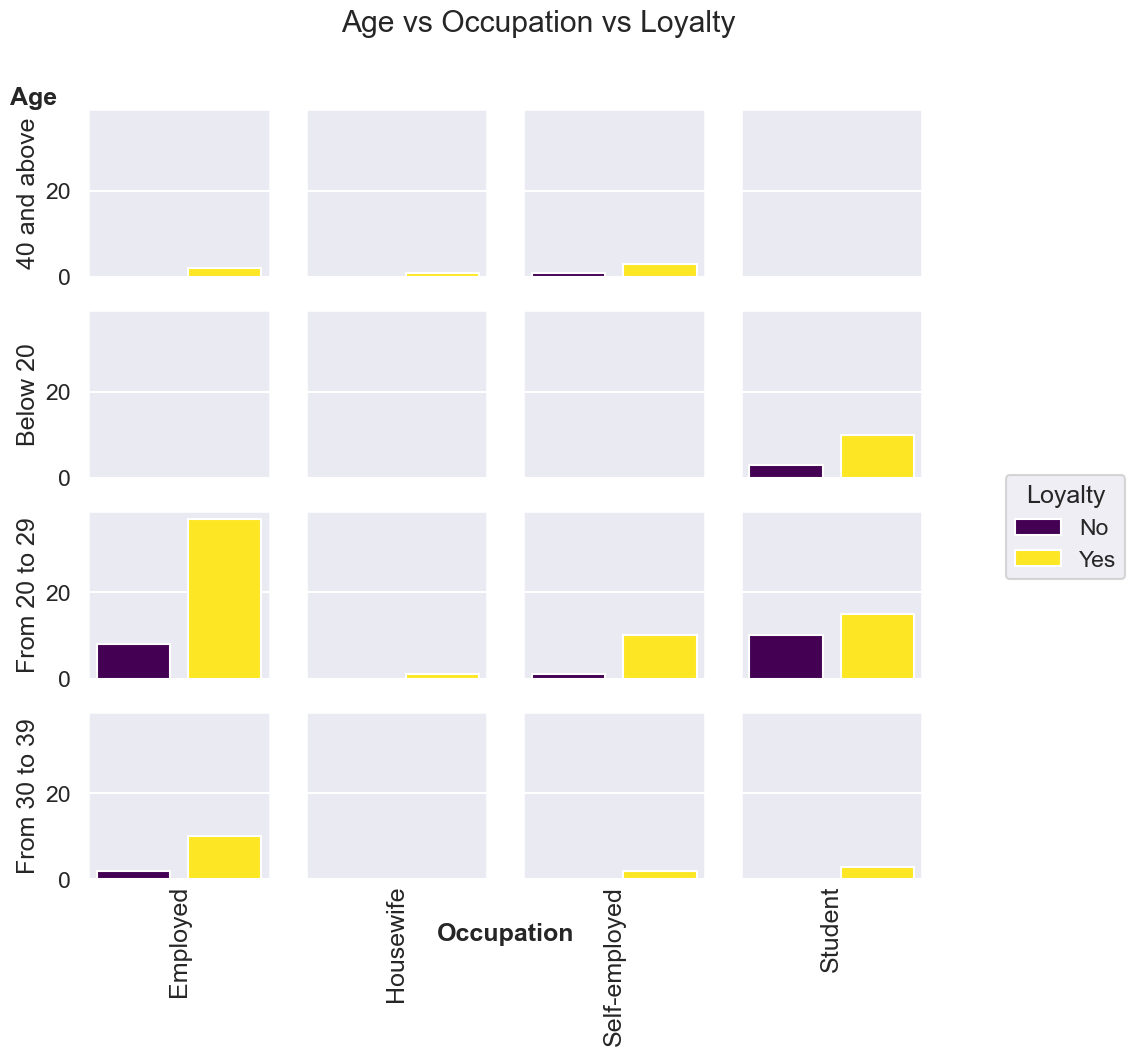

In [88]:
plot_fun(df, 'Age','Occupation','Loyalty')

- Among customers from age group 20-29 Employed are the majority group next comes Student and then Self-Employeed
- Even the Self-Employeed are less in count they have high loyality percentage then comes Employees.  Students have high negitive responses
- Customers below age group 20 have significantly high positive response
- Customers from aage group 30-39 have good positive response

`Occupation_vs_AnnualIncome_vs_Loyalty`

Employed Less than RM25,000
Employed More than RM150,000
Employed RM100,000 - RM150,000
Employed RM25,000 - RM50,000
Employed RM50,000 - RM100,000
Housewife Less than RM25,000
Housewife RM50,000 - RM100,000
Self-employed Less than RM25,000
Self-employed More than RM150,000
Self-employed RM100,000 - RM150,000
Self-employed RM25,000 - RM50,000
Self-employed RM50,000 - RM100,000
Student Less than RM25,000
Student RM50,000 - RM100,000
                                    dummy      
Loyalty                                No   Yes
Occupation    Annual_Income                    
Employed      Less than RM25,000      3.0  21.0
              More than RM150,000     1.0   1.0
              RM100,000 - RM150,000   1.0   1.0
              RM25,000 - RM50,000     4.0  17.0
              RM50,000 - RM100,000    1.0   9.0
Housewife     Less than RM25,000      NaN   1.0
              RM50,000 - RM100,000    NaN   1.0
Self-employed Less than RM25,000      1.0   4.0
              More than RM150,000    

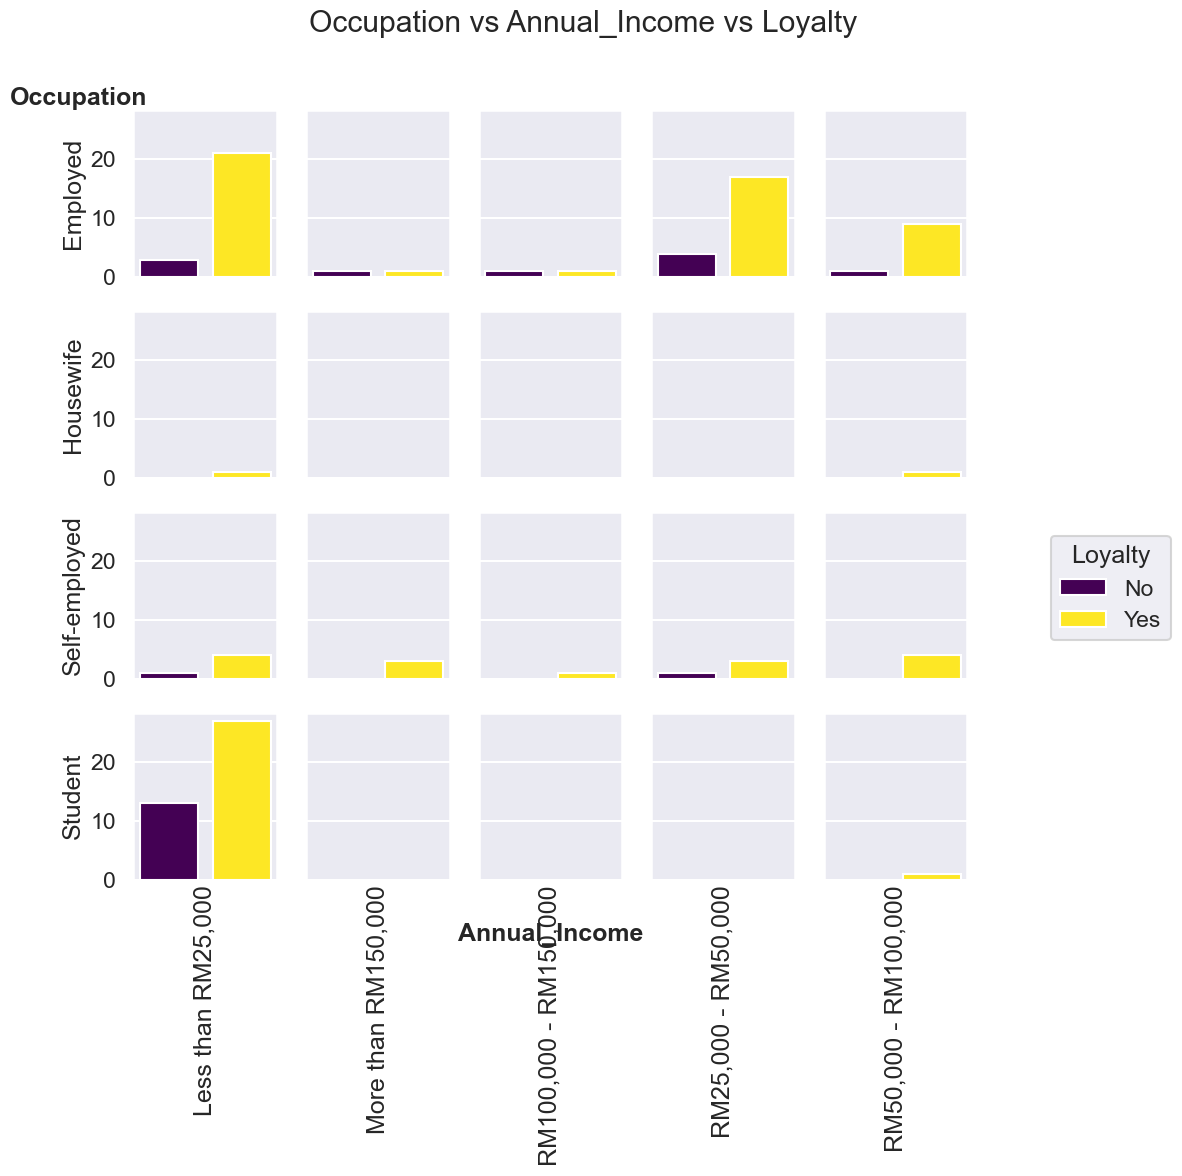

In [89]:
plot_fun(df,'Occupation', 'Annual_Income','Loyalty')

- Customers from Employeed category having income less than RM50000 have high postitve response 
- Students have income less than RM250000 and they are high postive response as well significant negitive response

We have seens the Females and Males are comparale in count. Lets find out the if there are any interesting factors

`Gender_vs_AnnualIncome_vs_Loyalty`

Female Less than RM25,000
Female RM25,000 - RM50,000
Female RM50,000 - RM100,000
Male Less than RM25,000
Male More than RM150,000
Male RM100,000 - RM150,000
Male RM25,000 - RM50,000
Male RM50,000 - RM100,000
                             dummy      
Loyalty                         No   Yes
Gender Annual_Income                    
Female Less than RM25,000     12.0  30.0
       RM25,000 - RM50,000     2.0  14.0
       RM50,000 - RM100,000    1.0   6.0
Male   Less than RM25,000      5.0  23.0
       More than RM150,000     1.0   4.0
       RM100,000 - RM150,000   1.0   2.0
       RM25,000 - RM50,000     3.0   6.0
       RM50,000 - RM100,000    NaN   9.0


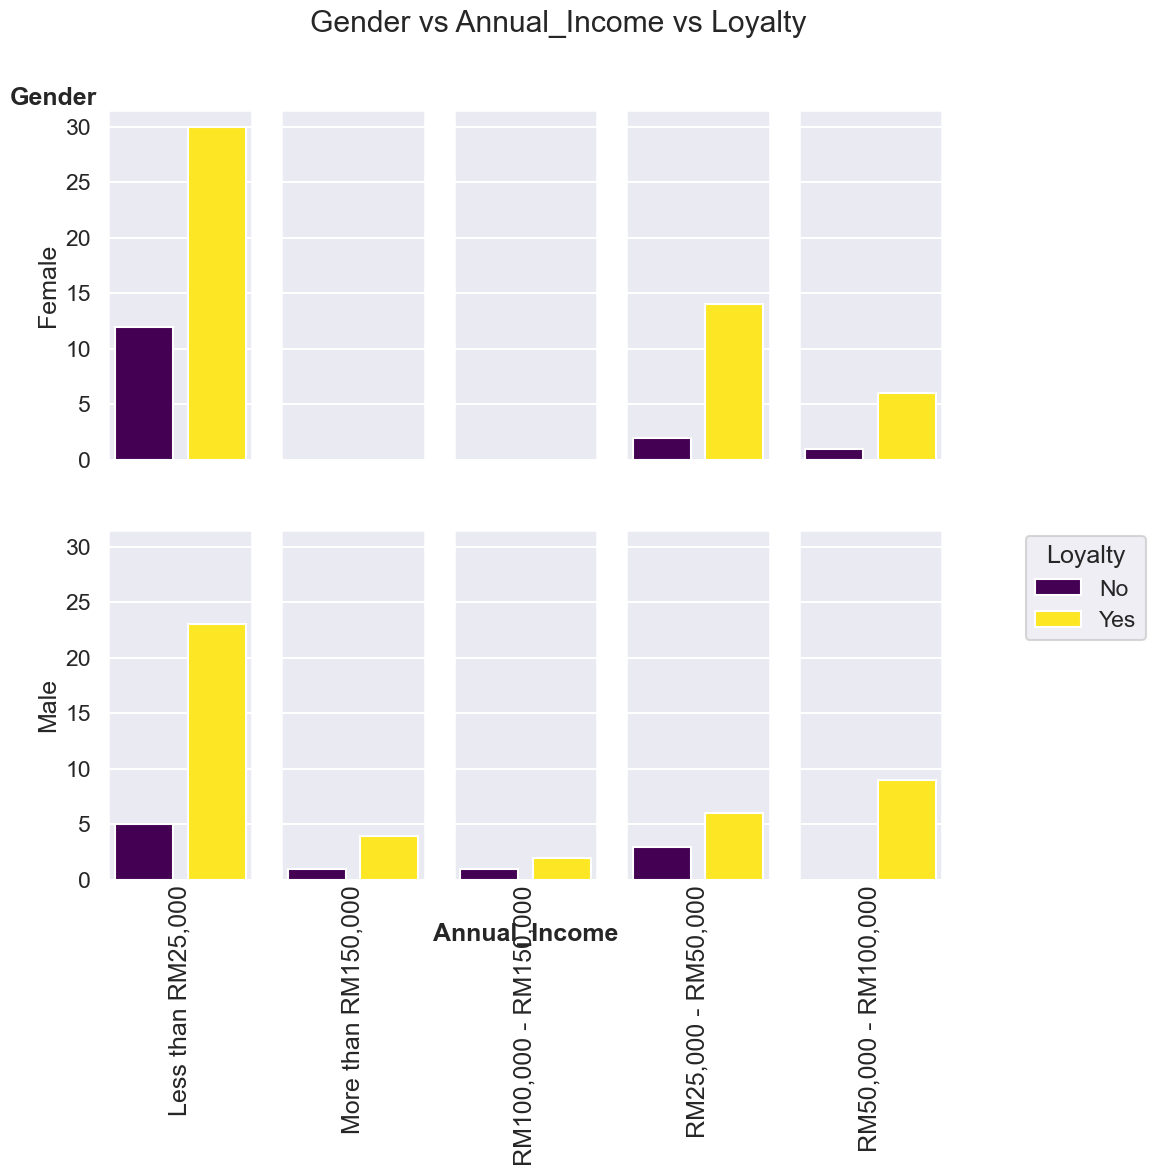

In [90]:
plot_fun(df,'Gender', 'Annual_Income','Loyalty')

- Female customers are more loyal than Male customers
- Above 100000 we seem to have more male customers than Females

Lets understand the difference in the Male and Female loyality based on their age, Occupation, Annual_Income details

Lets convert the Loyalty column values yes to 1 and No to 0 <br>
Also create Loyalty_invert column with values yes as 0 and No as 1

In [91]:
df.Loyalty = df.Loyalty.apply(lambda x: 1 if x=='Yes' else 0)
df['Loyalty_invert'] = df.Loyalty.apply(lambda x: 1 if x==0 else 0)
df.Loyalty_invert.value_counts()

Loyalty_invert
0    94
1    25
Name: count, dtype: int64

`Gender_vs_Age_vs_Occupation_vs_Annual_Income_vs_Loyalty`

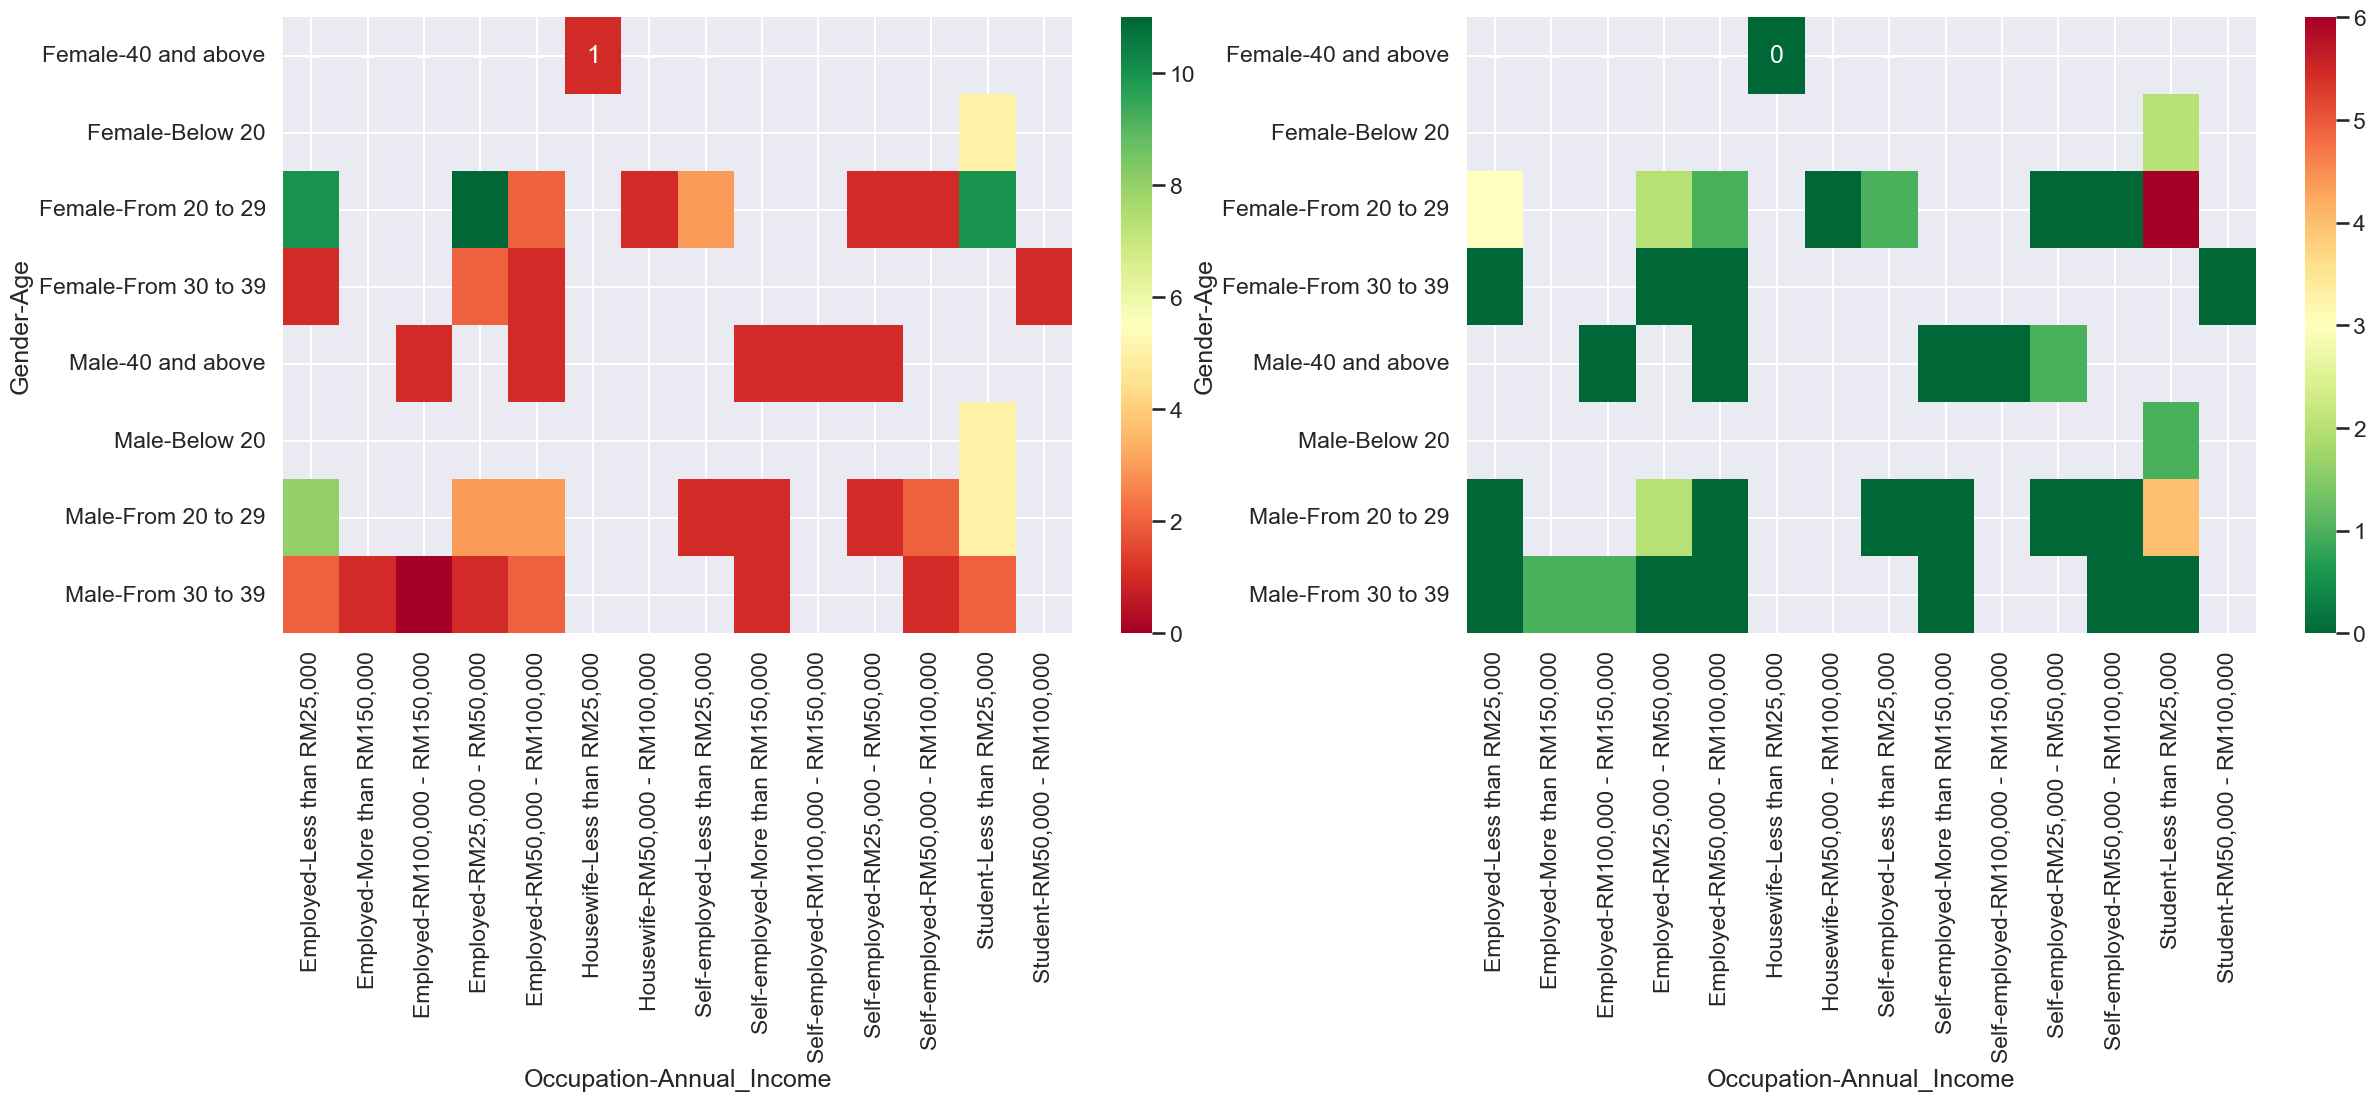

In [92]:
pivot_df = pd.pivot_table(data=df, index=['Gender','Age'], columns=['Occupation','Annual_Income'], values='Loyalty', aggfunc='sum')

plt.figure(figsize=(28,8))
plt.subplot(1,2,1)
sns.heatmap(data=pivot_df, cmap='RdYlGn', annot=True)
pivot_df = pd.pivot_table(data=df, index=['Gender','Age'], columns=['Occupation','Annual_Income'], values='Loyalty_invert', aggfunc='sum')
plt.subplot(1,2,2)
sns.heatmap(data=pivot_df, cmap='RdYlGn_r', annot=True)
plt.show()

- Female in 20-29 age have 10 positive responses and 3 negitive responses. They are employees with income less than RM25000
- Female in 20-29 age have 11 positive responses and 2 negitive responses. They are employees with income greater than RM25000 and less then RM50000
- Employed Males of age 20 to 29 and income less than RM25000 have no negitive response. Whereas Males of same categories except income ranging between RM25000 to RM 50000 almost equal positive and negitive responses(3+vs,  2-vs)
- Males from 30 to 39 age from students lessthanRM25000 have almost equal positive and negitive responses(5+vs,  4-vs)
- Females from 20-29 who are students and income less than RM25000 have high positive and negitive responses
- we can see only one 0 in the left heat map and corresponding value in the right heap map has either zero or less number. This says that all the different categories are having high loyal customers



lets check the different factors for the category female student, age 20-29 with income less than RM25000

In [93]:
df3 = df.loc[(df.Gender== 'Female')&(df.Occupation == 'Student') & (df.Age == 'From 20 to 29')&(df.Annual_Income=='Less than RM25,000'),:]
df3

,Timestamp,Gender,Age,Occupation,Annual_Income,Visit_Frequency,Service_preferred,Time_Spent_Frequency,Nearest_Store_Distance,Membership,...,Quality_Rating_vs_Other_Brands,Price_Rating,Sales_Promotion_Importance,Ambiance_Rating,WiFi_Rating,Service_Rating,Meetings_hangouts_preference,Promotion_Source,Loyalty,Loyalty_invert
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,1,0
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,4,3,4,4,4,5,2,Social Media;In Store displays,1,0
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,2,1,4,3,3,3,3,Through friends and word of mouth,0,1
5,2019/10/01 12:39:39 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,No,...,4,3,5,5,4,5,4,Social Media,1,0
6,2019/10/01 12:39:42 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Below 30 minutes,within 1km,Yes,...,5,5,5,5,3,5,5,Starbucks Website/Apps;Social Media,1,0
8,2019/10/01 12:42:27 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Drive-thru,Below 30 minutes,more than 3km,Yes,...,5,4,4,4,4,4,4,Starbucks Website/Apps;Social Media;Through fr...,1,0
10,2019/10/01 12:47:00 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Below 30 minutes,more than 3km,No,...,4,1,4,5,3,3,4,Social Media,1,0
11,2019/10/01 12:48:26 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,No,...,3,2,4,4,3,4,4,Starbucks Website/Apps;Social Media;Through fr...,0,1
12,2019/10/01 12:49:25 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Weekly,Take away,Below 30 minutes,1km - 3km,Yes,...,4,3,2,4,4,3,4,Social Media,1,0
13,2019/10/01 12:53:09 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,4,3,4,4,4,4,3,Social Media,1,0


`AvgMoneySpent_vs_PriceRating_vs_AmbianceRating_vs_ServiceRating_vs_Loyalty of the above category`

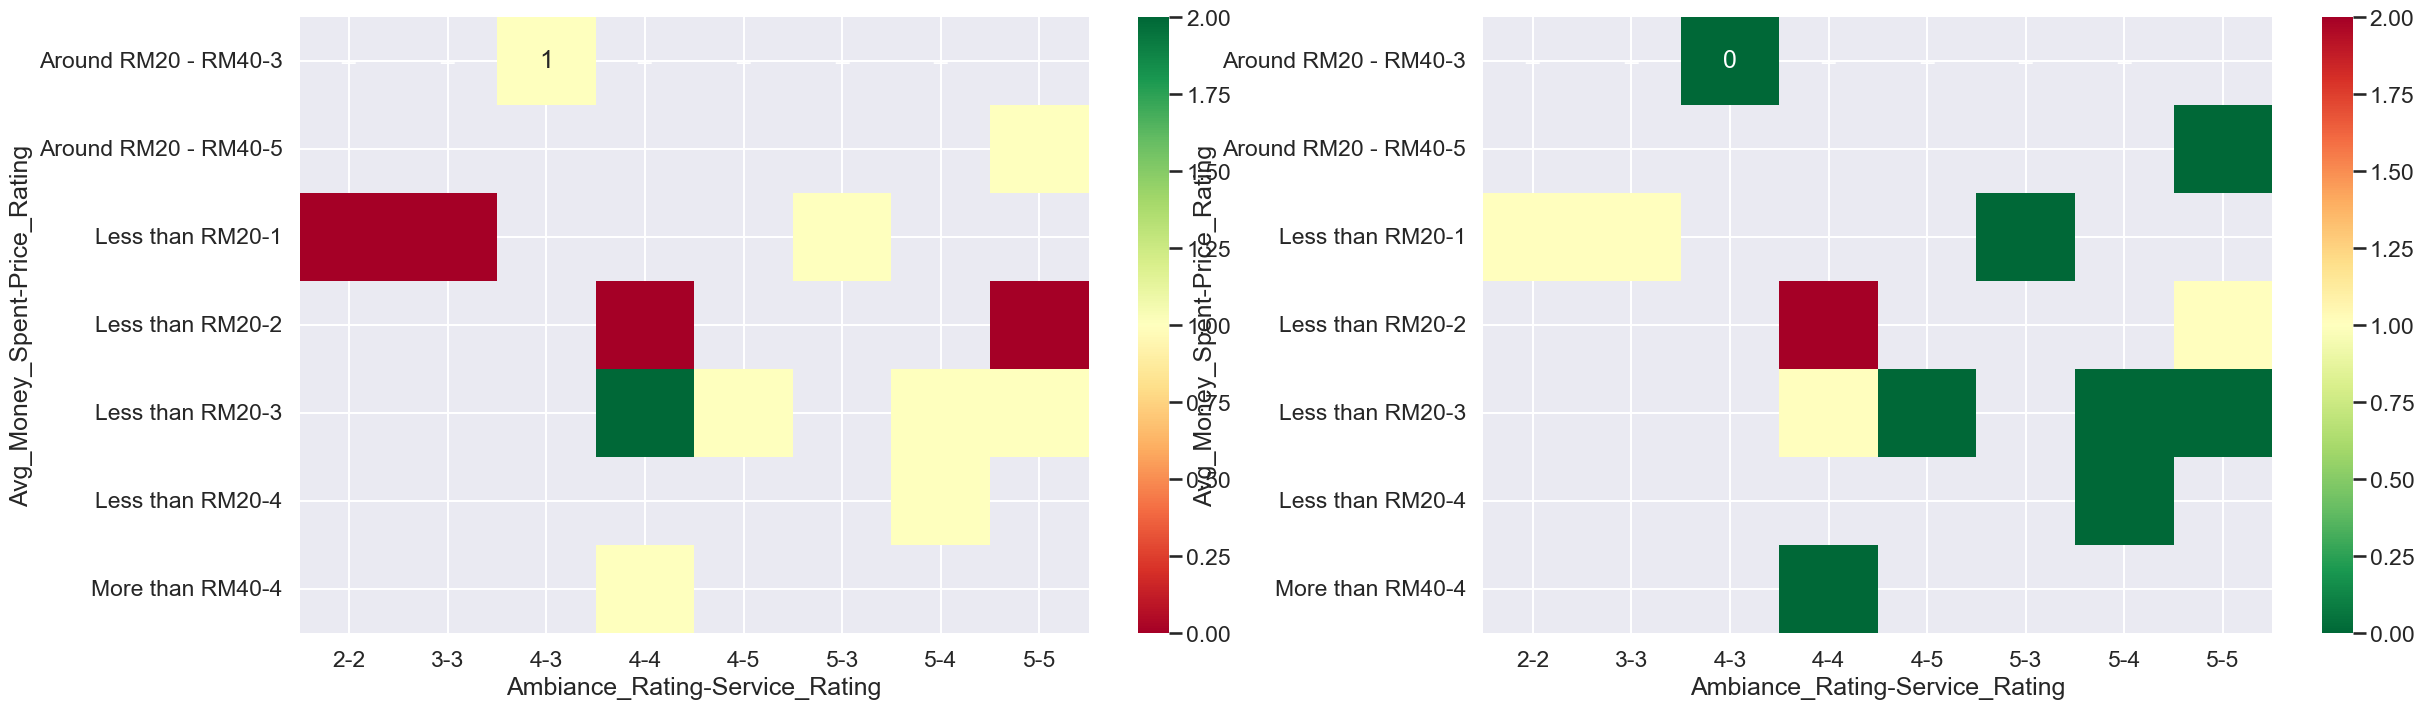

In [94]:
pivot_df = pd.pivot_table(data=df3, index=['Avg_Money_Spent','Price_Rating'], columns=['Ambiance_Rating','Service_Rating'], values='Loyalty', aggfunc='sum')

plt.figure(figsize=(28,8))
plt.subplot(1,2,1)
sns.heatmap(data=pivot_df, cmap='RdYlGn', annot=True)
pivot_df = pd.pivot_table(data=df3, index=['Avg_Money_Spent','Price_Rating'], columns=['Ambiance_Rating','Service_Rating'], values='Loyalty_invert', aggfunc='sum')
plt.subplot(1,2,2)
sns.heatmap(data=pivot_df, cmap='RdYlGn_r', annot=True)
plt.show()

- customer with ambiance and service rating between 3 -5 are more loyal
- cusstomers with less price rating are less loyal

`VisitFrequency_vs_TimeSpentFrequency_vs_NearestStoreDistance_vs_Membership_vs_Loyalty`

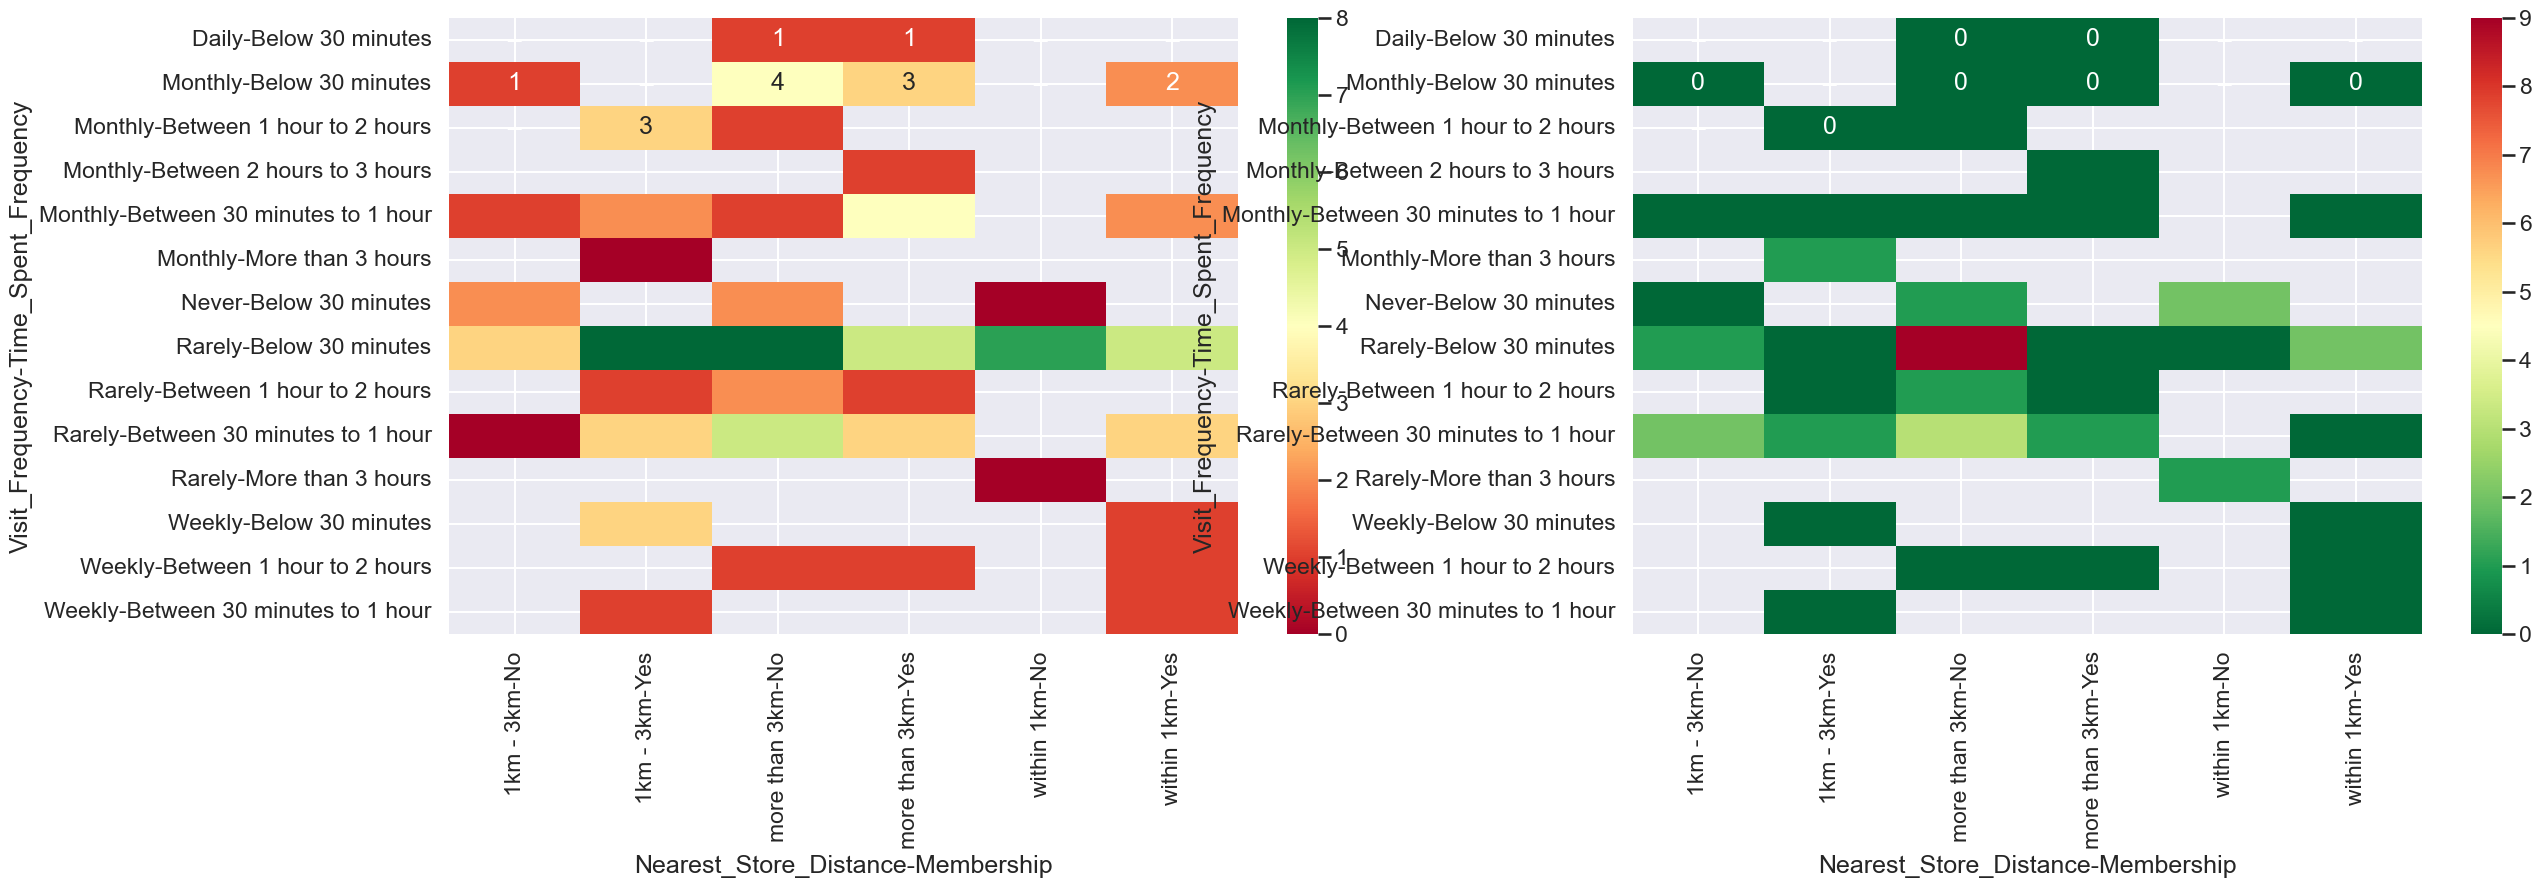

In [95]:
pivot_df = pd.pivot_table(data=df, index=['Visit_Frequency','Time_Spent_Frequency'], columns=['Nearest_Store_Distance','Membership'], values='Loyalty', aggfunc='sum')

plt.figure(figsize=(28,8))
plt.subplot(1,2,1)
sns.heatmap(data=pivot_df, cmap='RdYlGn', annot=True)
pivot_df = pd.pivot_table(data=df, index=['Visit_Frequency','Time_Spent_Frequency'], columns=['Nearest_Store_Distance','Membership'], values='Loyalty_invert', aggfunc='sum')
plt.subplot(1,2,2)
sns.heatmap(data=pivot_df, cmap='RdYlGn_r', annot=True)
plt.show()

- It is evident that customers having membership are more loyal compared to customers without membership
- Customers visiting rarely, time_spent_frequency below 30min, nearesr store more than 3km and doesn't have membership, they have almost equal postive and negitive responses. whereas nearest store 1km-3km and have membership, they are positively responding
- Weekly visiting customers are very low but stores within 1km they are postively responding
- The green color in the 2nd graph says we don't have much negitive responses. Whereas the red color in the 1st graph says we don't have more postive responses as well. Only  few group of customers are exibiting high postitive responses which is evident
- Both customers with visiting daily spending 30 mins and monthly visiting customers are all loyal except one with time spending more than 3 hours.

Lets analyse the data for the category with most non-loyal customers (9) in the above graph

In [96]:
df2 = df.loc[(df.Visit_Frequency== 'Rarely')&(df.Time_Spent_Frequency == 'Below 30 minutes') & (df.Nearest_Store_Distance == 'more than 3km')&(df.Membership=='No'),:]

In [97]:
pd.set_option('display.max_columns', 50)
df2

,Timestamp,Gender,Age,Occupation,Annual_Income,Visit_Frequency,Service_preferred,Time_Spent_Frequency,Nearest_Store_Distance,Membership,Frequent_Product,Avg_Money_Spent,Quality_Rating_vs_Other_Brands,Price_Rating,Sales_Promotion_Importance,Ambiance_Rating,WiFi_Rating,Service_Rating,Meetings_hangouts_preference,Promotion_Source,Loyalty,Loyalty_invert
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,0,1
10,2019/10/01 12:47:00 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Below 30 minutes,more than 3km,No,Cold drinks,Less than RM20,4,1,4,5,3,3,4,Social Media,1,0
32,2019/10/01 1:45:12 PM GMT+8,Female,From 30 to 39,Employed,"RM25,000 - RM50,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Around RM20 - RM40,2,3,5,5,3,5,5,Social Media,1,0
35,2019/10/01 1:51:56 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,4,2,4,4,3,4,1,Social Media,0,1
51,2019/10/01 3:16:32 PM GMT+8,Female,Below 20,Student,"Less than RM25,000",Rarely,Dine in,Below 30 minutes,more than 3km,No,Cold drinks,Less than RM20,3,3,2,2,2,4,3,Social Media;Through friends and word of mouth,0,1
53,2019/10/01 3:21:16 PM GMT+8,Female,Below 20,Student,"Less than RM25,000",Rarely,Drive-thru,Below 30 minutes,more than 3km,No,Coffee,Around RM20 - RM40,3,3,2,3,3,3,3,Social Media,1,0
59,2019/10/01 6:19:46 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Drive-thru,Below 30 minutes,more than 3km,No,Cold drinks,Less than RM20,4,3,4,4,3,4,3,Starbucks Website/Apps;Social Media,1,0
64,2019/10/02 7:15:13 PM GMT+8,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Zero,3,1,5,3,4,4,5,Social Media,0,1
68,2019/10/02 7:29:53 PM GMT+8,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Dine in,Below 30 minutes,more than 3km,No,Coffee,Zero,2,1,5,4,4,4,1,Starbucks Website/Apps;Social Media;Through fr...,0,1
74,2019/10/02 8:31:21 PM GMT+8,Female,From 20 to 29,Housewife,"RM50,000 - RM100,000",Rarely,Drive-thru,Below 30 minutes,more than 3km,No,Coffee;Cold drinks,Around RM20 - RM40,3,2,3,3,3,5,4,Social Media,1,0


- majorty of the customers are Female
- the customers visit frequency is Rare
- Time spent frequency below 30mins
- Nearest store more tha   3km
- The customers don't have membership

`AvgMoneySpent_vs_PriceRating_vs_AmbianceRating_vs_ServiceRating_vs_Loyalty for above category`

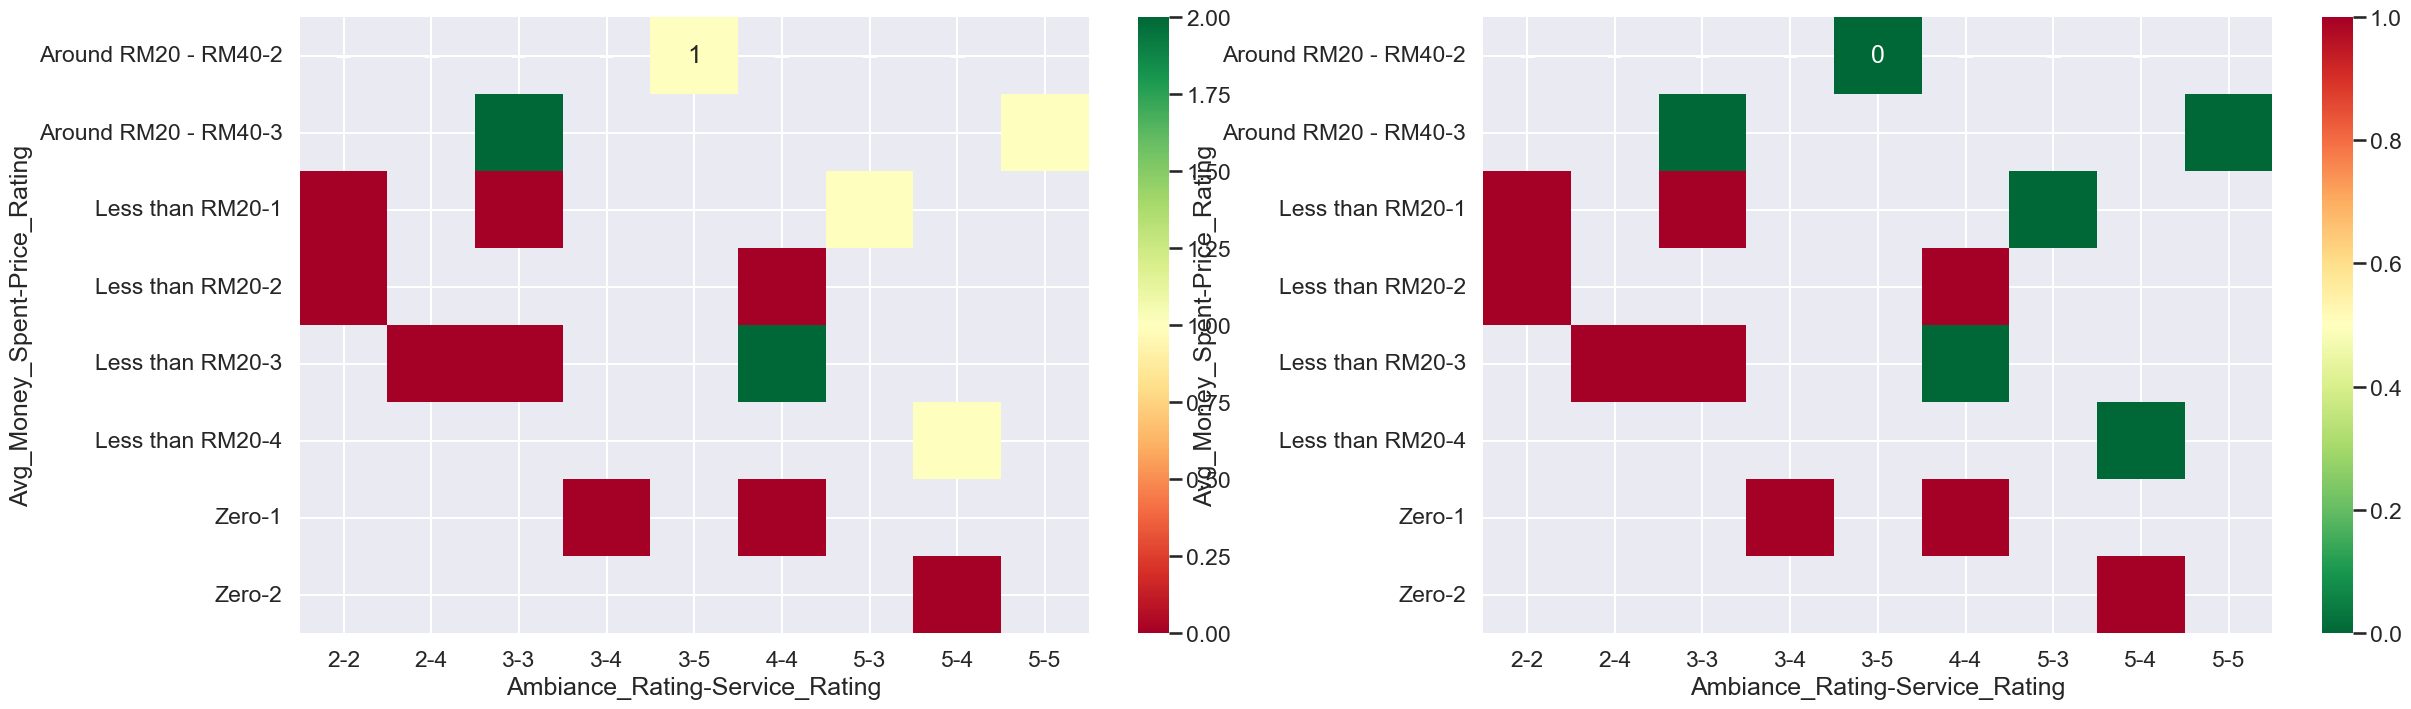

In [98]:
pivot_df = pd.pivot_table(data=df2, index=['Avg_Money_Spent','Price_Rating'], columns=['Ambiance_Rating','Service_Rating'], values='Loyalty', aggfunc='sum')

plt.figure(figsize=(28,8))
plt.subplot(1,2,1)
sns.heatmap(data=pivot_df, cmap='RdYlGn', annot=True)
pivot_df = pd.pivot_table(data=df2, index=['Avg_Money_Spent','Price_Rating'], columns=['Ambiance_Rating','Service_Rating'], values='Loyalty_invert', aggfunc='sum')
plt.subplot(1,2,2)
sns.heatmap(data=pivot_df, cmap='RdYlGn_r', annot=True)
plt.show()

- Customers with Price_rating 1 or 2 are mot loyal even the ambiance and Serivce rating is >=3
- customer with Price_rating > 3 are more loyal and the ambiance and Service rating with high rating has positive impact

Lets understand these features impact on complete data

In [99]:
df3 = df.loc[(df.Visit_Frequency== 'Daily')|(df.Visit_Frequency== 'Monthly'),:]
df3

,Timestamp,Gender,Age,Occupation,Annual_Income,Visit_Frequency,Service_preferred,Time_Spent_Frequency,Nearest_Store_Distance,Membership,Frequent_Product,Avg_Money_Spent,Quality_Rating_vs_Other_Brands,Price_Rating,Sales_Promotion_Importance,Ambiance_Rating,WiFi_Rating,Service_Rating,Meetings_hangouts_preference,Promotion_Source,Loyalty,Loyalty_invert
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,1,0
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,1,0
9,2019/10/01 12:43:36 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Take away,Below 30 minutes,more than 3km,No,Coffee,Around RM20 - RM40,4,3,3,4,3,3,4,Social Media;Through friends and word of mouth,1,0
16,2019/10/01 12:59:11 PM GMT+8,Male,From 30 to 39,Employed,"RM50,000 - RM100,000",Monthly,Drive-thru,Below 30 minutes,within 1km,Yes,Coffee,Around RM20 - RM40,4,3,3,4,3,3,3,Social Media,1,0
23,2019/10/01 1:24:04 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Monthly,Drive-thru,Between 1 hour to 2 hours,1km - 3km,Yes,Cold drinks;Pastries;Sandwiches,Less than RM20,5,4,4,5,4,4,3,Social Media;Through friends and word of mouth,1,0
25,2019/10/01 1:25:56 PM GMT+8,Male,From 30 to 39,Employed,"More than RM150,000",Monthly,Dine in,Between 30 minutes to 1 hour,1km - 3km,Yes,Coffee;Cold drinks,Around RM20 - RM40,4,3,1,4,4,5,4,Social Media;In Store displays;Billboards,1,0
27,2019/10/01 1:33:54 PM GMT+8,Male,From 20 to 29,Self-employed,"Less than RM25,000",Monthly,Take away,Below 30 minutes,more than 3km,No,Coffee,Around RM20 - RM40,5,3,4,4,3,4,3,Social Media,1,0
30,2019/10/01 1:39:16 PM GMT+8,Female,From 20 to 29,Employed,"RM25,000 - RM50,000",Monthly,Take away,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee;Pastries;Sandwiches,Around RM20 - RM40,3,1,4,4,3,4,4,Starbucks Website/Apps;Social Media;Emails;Thr...,1,0
41,2019/10/01 2:06:24 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Around RM20 - RM40,5,4,5,5,3,5,5,Starbucks Website/Apps;Social Media,1,0
43,2019/10/01 2:35:40 PM GMT+8,Female,From 20 to 29,Employed,"Less than RM25,000",Monthly,Take away,Below 30 minutes,more than 3km,No,Coffee;Pastries,Around RM20 - RM40,4,4,5,4,4,5,5,Starbucks Website/Apps;Social Media;Emails;Bil...,1,0


`AvgMoneySpent_vs_PriceRating_vs_AmbianceRating_vs_ServiceRating_vs_Loyalty`

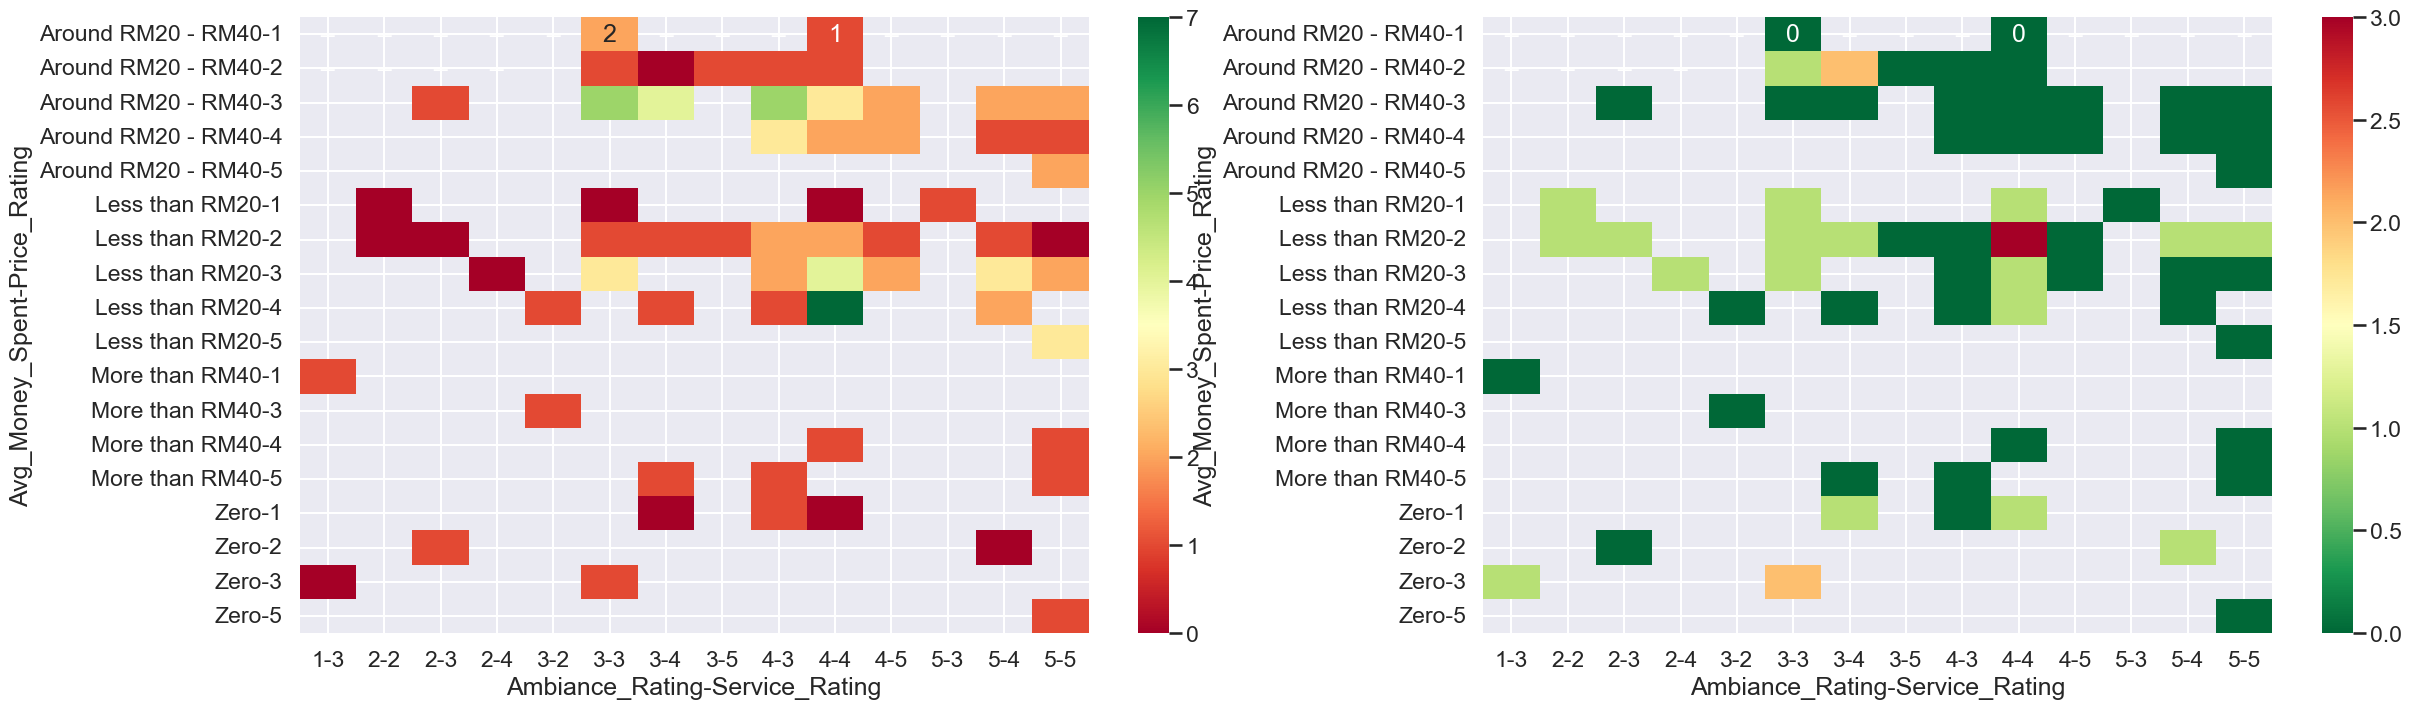

In [100]:
pivot_df = pd.pivot_table(data=df, index=['Avg_Money_Spent','Price_Rating'], columns=['Ambiance_Rating','Service_Rating'], values='Loyalty', aggfunc='sum')

plt.figure(figsize=(28,8))
plt.subplot(1,2,1)
sns.heatmap(data=pivot_df, cmap='RdYlGn', annot=True)
pivot_df = pd.pivot_table(data=df, index=['Avg_Money_Spent','Price_Rating'], columns=['Ambiance_Rating','Service_Rating'], values='Loyalty_invert', aggfunc='sum')
plt.subplot(1,2,2)
sns.heatmap(data=pivot_df, cmap='RdYlGn_r', annot=True)
plt.show()

- Loyality increasing with the increase in Price rating, ambiance rating, service rating
- Customer giving high ambiance rating, Service rating are more loyal if the average money spent greater than RM20. Price rating doesn't  have much impact on this. These are customers who are more interested in Services and ambiance

Create a temp feature to calculate the categories count for the chi-square test

In [101]:
df['temp'] = 1
df.temp

0      1
1      1
2      1
3      1
4      1
      ..
116    1
117    1
118    1
119    1
120    1
Name: temp, Length: 119, dtype: int64

In [102]:
def chiSquareTest(df, col1, col2, col_list):
    cont_table = df.groupby([col1, col2])['temp'].count().unstack()
    cont_table.fillna(0, inplace=True)
    stat, p, dof, expected = st.chi2_contingency(cont_table)

    prob = 0.90
    critical = st.chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        print('Dependent (reject H0) and the features are: '+ col1)
        print(stat, critical)
        col_list.append(col1)

In [103]:
cols = df.columns

In [104]:
col_list = []
for  i in cols[1:-4]:
    #print("Correlation of Col: "+i)
    chiSquareTest(df, i, 'Loyalty', col_list)

Dependent (reject H0) and the features are: Visit_Frequency
11.76312078559738 7.779440339734858
Dependent (reject H0) and the features are: Time_Spent_Frequency
8.949119650202958 7.779440339734858
Dependent (reject H0) and the features are: Membership
10.225935779540809 2.705543454095404
Dependent (reject H0) and the features are: Avg_Money_Spent
18.313651362448674 6.251388631170325
Dependent (reject H0) and the features are: Quality_Rating_vs_Other_Brands
17.992995327213645 6.251388631170325
Dependent (reject H0) and the features are: Price_Rating
24.535001253671467 7.779440339734858
Dependent (reject H0) and the features are: Ambiance_Rating
13.032220403709768 7.779440339734858
Dependent (reject H0) and the features are: Service_Rating
7.203973586636884 6.251388631170325
Dependent (reject H0) and the features are: Meetings_hangouts_preference
14.929696630357324 7.779440339734858


The columns with significant difference with the loyalty

In [105]:
print(col_list)

['Visit_Frequency', 'Time_Spent_Frequency', 'Membership', 'Avg_Money_Spent', 'Quality_Rating_vs_Other_Brands', 'Price_Rating', 'Ambiance_Rating', 'Service_Rating', 'Meetings_hangouts_preference']


#### Found different categories among loyal and non-loyal customers. As the number of customers belonging to those categories are very less, need more data to understand their behaviour stability.